In [318]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [319]:
### Direct to the correct folder
path = 'D:/files/second_part/fullmarkers_COM_version'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [320]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [321]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [322]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [323]:
df["std_AP_aCOM"]

0      14647.1203
1      21869.8047
2      24230.4682
3      20774.4280
4      21799.1375
          ...    
236    23477.7481
237           NaN
238    18325.6467
239    15723.4723
240    13665.1723
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [324]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [325]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [326]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [327]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  239.000000  239.000000        239.000000  239.000000  239.000000   
mean   188.160641    9.033644         10.371787  647.373401   31.282284   
std     23.949809    2.661646          1.978403   80.376990    8.896949   
min     16.079600    0.546850          0.743610   37.391400    1.235600   
max    246.367500   15.883400         17.296300  767.969200   54.820100   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   239.000000   239.000000         239.000000   239.000000   239.000000   
mean    165.003888   193.220518         272.755190  2807.048683   332.482523   
std      38.415347    42.561060          66.476511   687.511350   112.757832   
min      44.791300    53.171400          95.277200  2059.715700    40.640200   
max     387.256500   370.772800         711.277800  7381.223300   835.649600   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   239.000000  239.000000  239.000000  239.000000  233.000000   
mean   ...  -813.546511 -110.158423  534.892703  201.988769    0.471009   
std    ...   258.796059   35.453778  192.840665   43.220291    4.490310   
min    ... -1376.873000 -215.734900   50.000200   33.035500  -16.237800   
max    ...  -253.192300   70.837400  887.496600  331.084100   30.944900   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  233.000000  233.000000  233.000000  233.000000  233.000000  
mean    -0.011023    6.260289    1.613451   22.046497    6.609466  
std      3.128615    1.683800    0.754634    5.942656    3.024460  
min     -6.194100    0.000000    0.000000    0.000000    0.000000  
max      4.733600   11.339300    4.172200   39.342000   12.150100  

[5 rows x 69 columns]

In [328]:
df[df["std_AP_IA"].isnull()]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
21   sub01    204.8007     11.6771           10.6240    711.5242     40.2156   
95   sub08    202.3472      5.9730           13.4970    693.9921     21.3941   
114  sub09    186.5365     10.9583            8.4922    639.0499     38.2437   
119  sub09    161.8131     14.5103            8.4006    552.4498     47.2037   
167  sub13    246.3675      8.8594            6.1221    649.5133     25.3654   
210  sub17    197.3792      7.6865            9.6188    672.4456     26.4150   
223  sub19         NaN         NaN               NaN         NaN         NaN   
237  sub19         NaN         NaN               NaN         NaN         NaN   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
21      164.6848     232.2489           288.1011    3432.6337  ...   
95      187.3991     145.0633           348.8862    3237.2072  ...   
114     151.3204     238.3614           233.5017    2981.1291  ...   
119     111.0407     243.1947           239.7299    2642.1345  ...   
167     104.6765     201.1879           282.4538    2955.5501  ...   
210     239.6961     185.9397           227.1791    3452.9151  ...   
223          NaN          NaN                NaN          NaN  ...   
237          NaN          NaN                NaN          NaN  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
21    -114.3233    526.5197    231.9938         NaN         NaN        NaN   
95    -100.0384    708.6209    192.7575         NaN         NaN        NaN   
114   -149.6655    766.9914    229.3634         NaN         NaN        NaN   
119    -90.6046    362.0944    164.0625         NaN         NaN        NaN   
167    -97.7250    484.7359    196.0952         NaN         NaN        NaN   
210   -121.5548    887.4966    201.0063         NaN         NaN        NaN   
223         NaN         NaN         NaN         NaN         NaN        NaN   
237         NaN         NaN         NaN         NaN         NaN        NaN   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
21         NaN        NaN        NaN                Good  
95         NaN        NaN        NaN                Good  
114        NaN        NaN        NaN            Moderate  
119        NaN        NaN        NaN            Moderate  
167        NaN        NaN        NaN            Moderate  
210        NaN        NaN        NaN                Good  
223        NaN        NaN        NaN                 Bad  
237        NaN        NaN        NaN                 Bad  

[8 rows x 71 columns]

In [329]:
df_without_na = df.copy()
for ID in df["sub_ID"].unique():
    grouped_df = df[df["sub_ID"] == ID]
    for col in grouped_df.columns:
        if grouped_df[col].isna().sum() != 0:
            mean = grouped_df[col].mean()
            df_without_na[df_without_na["sub_ID"] == ID] = grouped_df.fillna(mean)
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 133
Amount of nan in current table: 0


In [330]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    193.2763     12.3079           10.4898    672.3373     40.9293   
51   sub03    196.6543      7.2676            8.6480    675.8896     25.1871   
130  sub10    188.6697     10.5758           12.0352    645.7068     36.9840   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      172.4515     174.7601           249.8048    2400.0393  ...   
51      115.4849     199.3802           252.6060    3212.6909  ...   
130     149.4212     218.6011           310.2397    3072.7877  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -130.7882    720.0807    232.8212     10.7240      1.8532    0.47200   
51    -108.9353    512.2518    213.1057      5.8072      2.3845    0.43797   
130   -215.7349    629.8264    316.7220     12.1701      1.7455    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.63440    2.21450    5.22880                Good  
51     0.19835    0.61938    0.28051                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [331]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    193.2763     12.3079           10.4898    672.3373     40.9293   
51   sub03    196.6543      7.2676            8.6480    675.8896     25.1871   
130  sub10    188.6697     10.5758           12.0352    645.7068     36.9840   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      172.4515     174.7601           249.8048    2400.0393  ...   
51      115.4849     199.3802           252.6060    3212.6909  ...   
130     149.4212     218.6011           310.2397    3072.7877  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -130.7882    720.0807    232.8212     10.7240      1.8532    0.47200   
51    -108.9353    512.2518    213.1057      5.8072      2.3845    0.43797   
130   -215.7349    629.8264    316.7220     12.1701      1.7455    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12     1.63440    2.21450    5.22880                Good  
51     0.19835    0.61938    0.28051                 Bad  
130    0.00000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [332]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [333]:
std_vretical_xCOM_outlier_inx = df_without_na[(df_without_na["std_vretical_xCOM"]) > 5].index

df_without_outlier = df_without_na.drop(std_vretical_xCOM_outlier_inx, axis = 0)

In [334]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  239.000000  239.000000        239.000000  239.000000  239.000000   
mean   188.160641    9.033644         10.371787  647.373401   31.282284   
std     23.949809    2.661646          1.978403   80.376990    8.896949   
min     16.079600    0.546850          0.743610   37.391400    1.235600   
max    246.367500   15.883400         17.296300  767.969200   54.820100   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   239.000000   239.000000         239.000000   239.000000   239.000000   
mean    165.003888   193.220518         272.755190  2807.048683   332.482523   
std      38.415347    42.561060          66.476511   687.511350   112.757832   
min      44.791300    53.171400          95.277200  2059.715700    40.640200   
max     387.256500   370.772800         711.277800  7381.223300   835.649600   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   239.000000  239.000000  239.000000  239.000000  239.000000   
mean   ...  -813.546511 -110.158423  534.892703  201.988769    0.619952   
std    ...   258.796059   35.453778  192.840665   43.220291    4.534698   
min    ... -1376.873000 -215.734900   50.000200   33.035500  -16.237800   
max    ...  -253.192300   70.837400  887.496600  331.084100   30.944900   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  239.000000  239.000000  239.000000  239.000000  239.000000  
mean     0.150021    6.263894    1.733713   21.653795    6.604305  
std      3.255252    1.675719    1.078397    6.362587    2.993595  
min     -6.194100    0.000000    0.000000    0.000000    0.000000  
max      8.125300   11.339300    8.125300   39.342000   12.150100  

[5 rows x 69 columns]

In [335]:
df_without_outlier.head()

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0  sub01    220.0775     12.3263           12.8126    767.2466     43.9719   
1  sub01    216.0915      8.1211           11.9798    751.3324     29.5469   
2  sub01    211.8467     10.7979           11.4190    738.7744     38.5899   
3  sub01    214.9099     10.5054           13.2807    746.7116     38.3915   
4  sub01    216.7382     11.0180           12.0510    754.5603     37.8966   

   std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  min_ML_MOS  \
0     174.0450     211.6344           284.2892    2496.6766  ...    -87.0116   
1     178.2405     195.6437           271.4910    2495.9274  ...   -101.6375   
2     178.0001     188.3602           246.0608    2283.5418  ...   -136.7953   
3     141.7616     228.5704           334.1286    3275.9483  ...   -118.3031   
4     194.5135     189.7581           299.6605    3465.1921  ...   -164.7282   

   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0    562.7531    206.2984   -0.184070      3.7900     7.6335     1.8669   
1    358.0427    219.0050   -0.549220     -4.2705     7.5783     2.0262   
2    798.2827    219.7981   17.737300     -6.1941     2.4905     1.1824   
3    387.3621    240.2440   -1.097000      4.0050     6.9300     1.8443   
4    828.7364    267.5760    0.018363     -3.7618     7.7442     1.8830   

   ROM_AP_IA  ROM_ML_IA  target_performance  
0    27.2933    10.8511                Good  
1    27.0895    10.2120                Good  
2     7.6797     4.0106                Good  
3    24.9026    10.5530                Good  
4    28.0477     9.7207                Good  

[5 rows x 71 columns]

In [336]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [337]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [338]:
#normalized_df

In [339]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [340]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [341]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [342]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [343]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [344]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [345]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [346]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

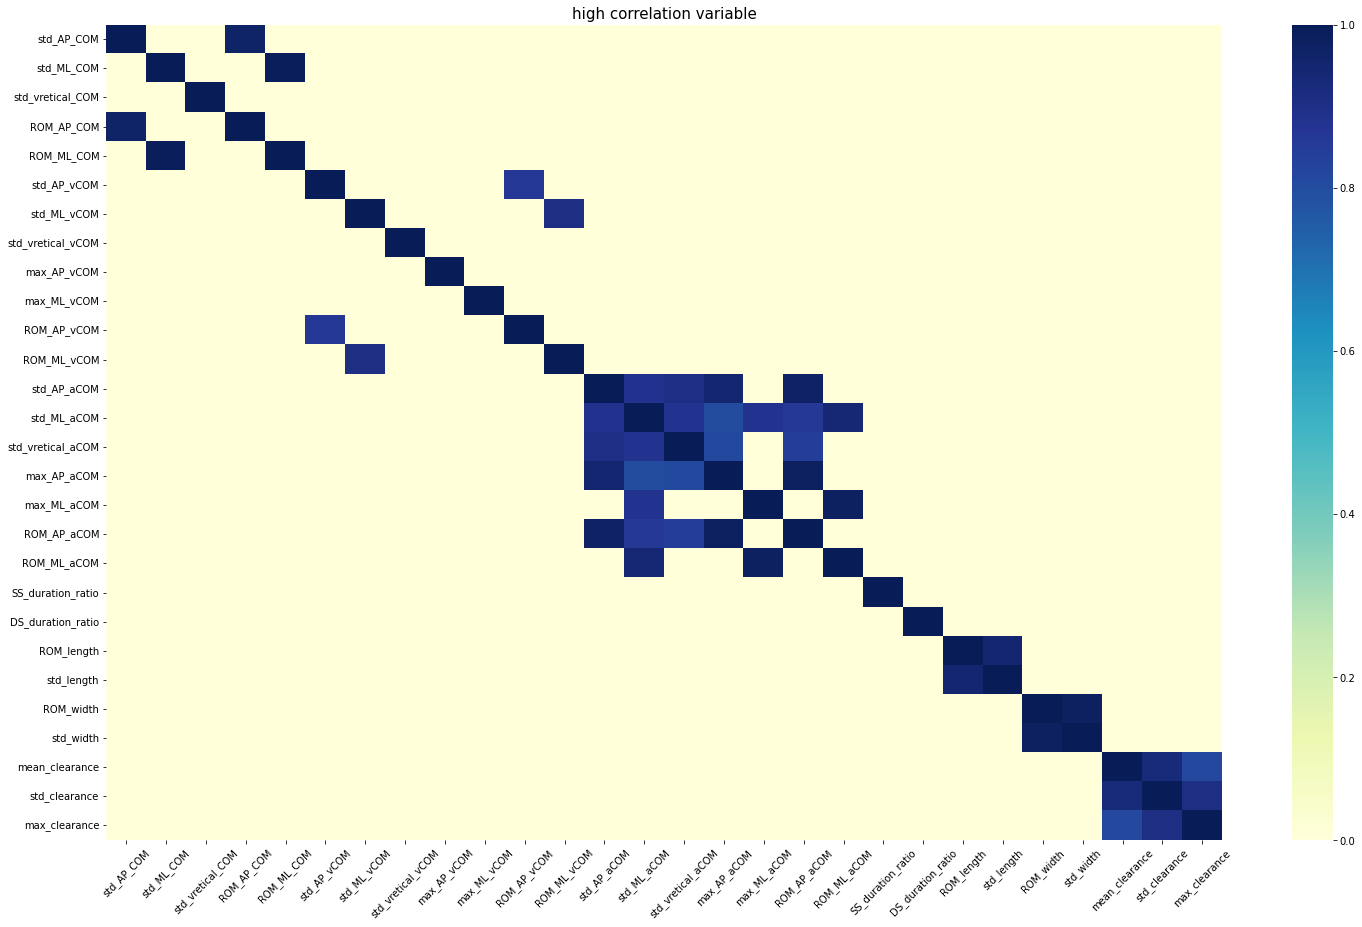

In [347]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [348]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

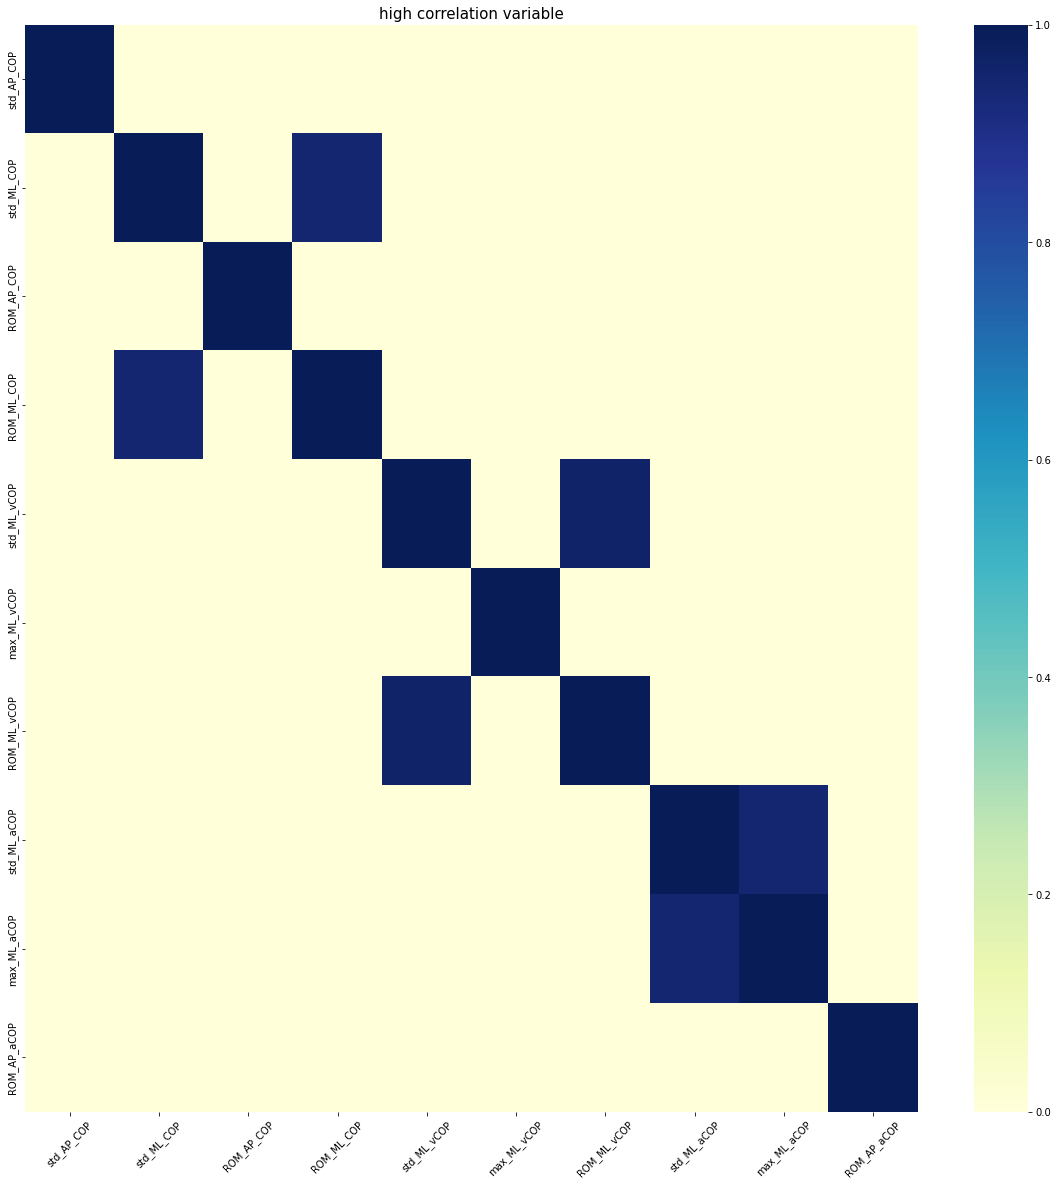

In [349]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [350]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

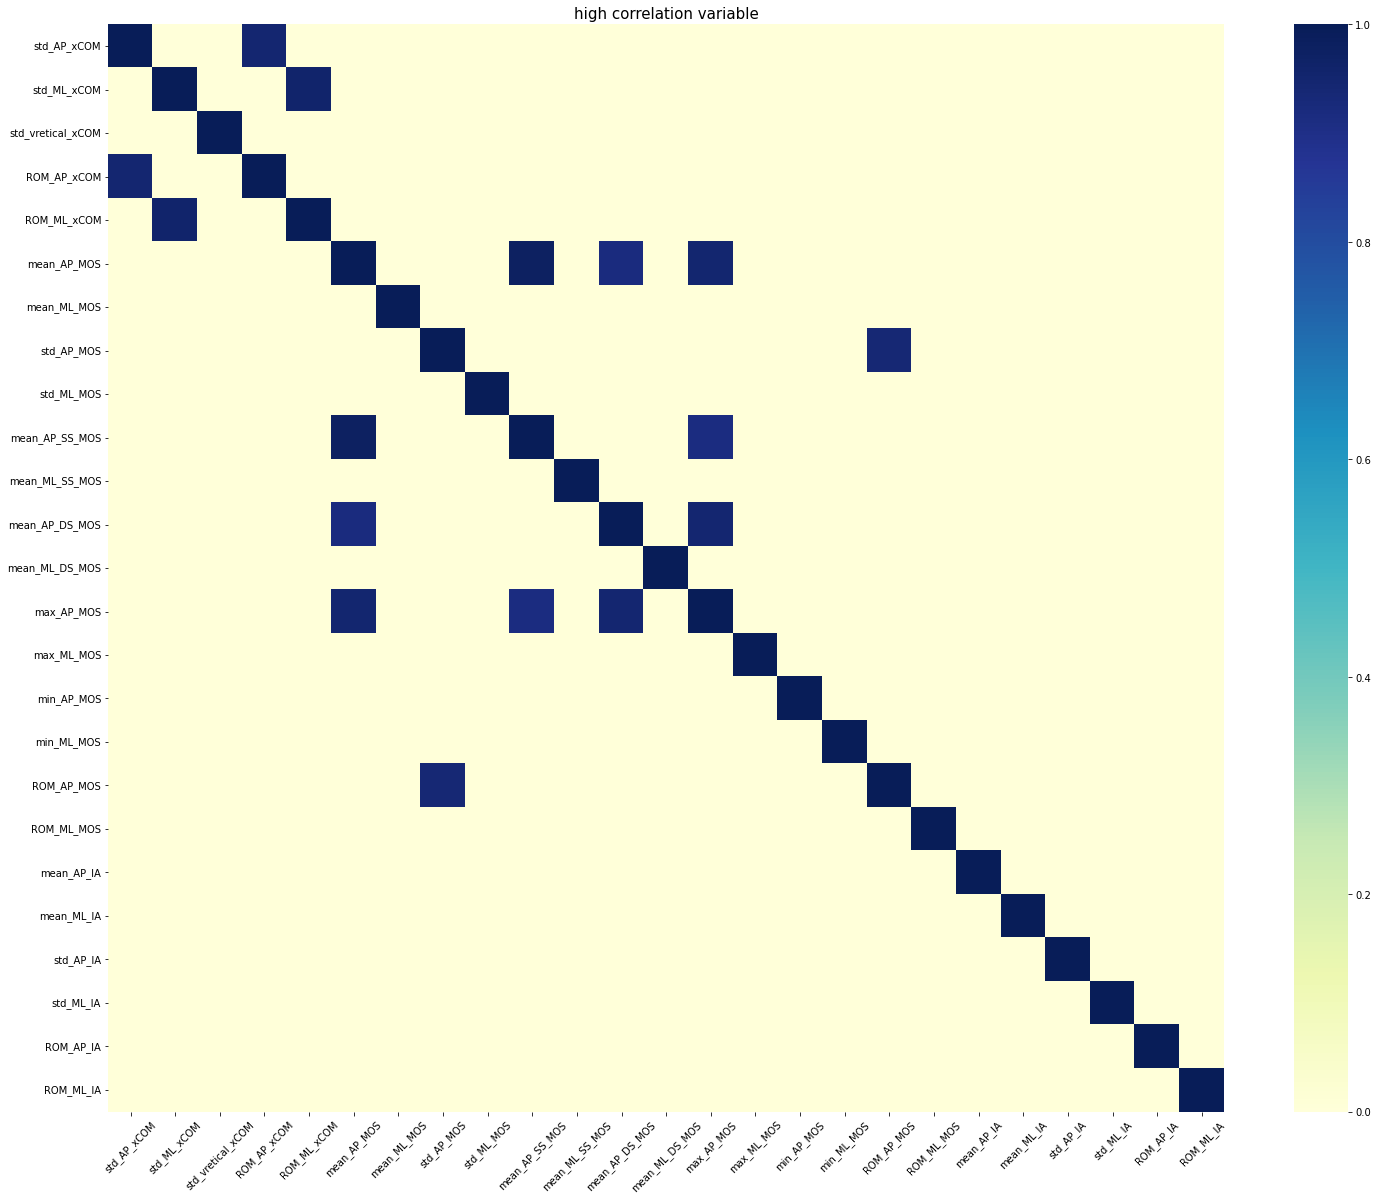

In [351]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [352]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]
spa_cop_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP','target_performance'
       ]]
spa_adv_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance'
       ]]
cop_adv_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance'
       ]]
kinematic_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS','target_performance']]
non_kinematic_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

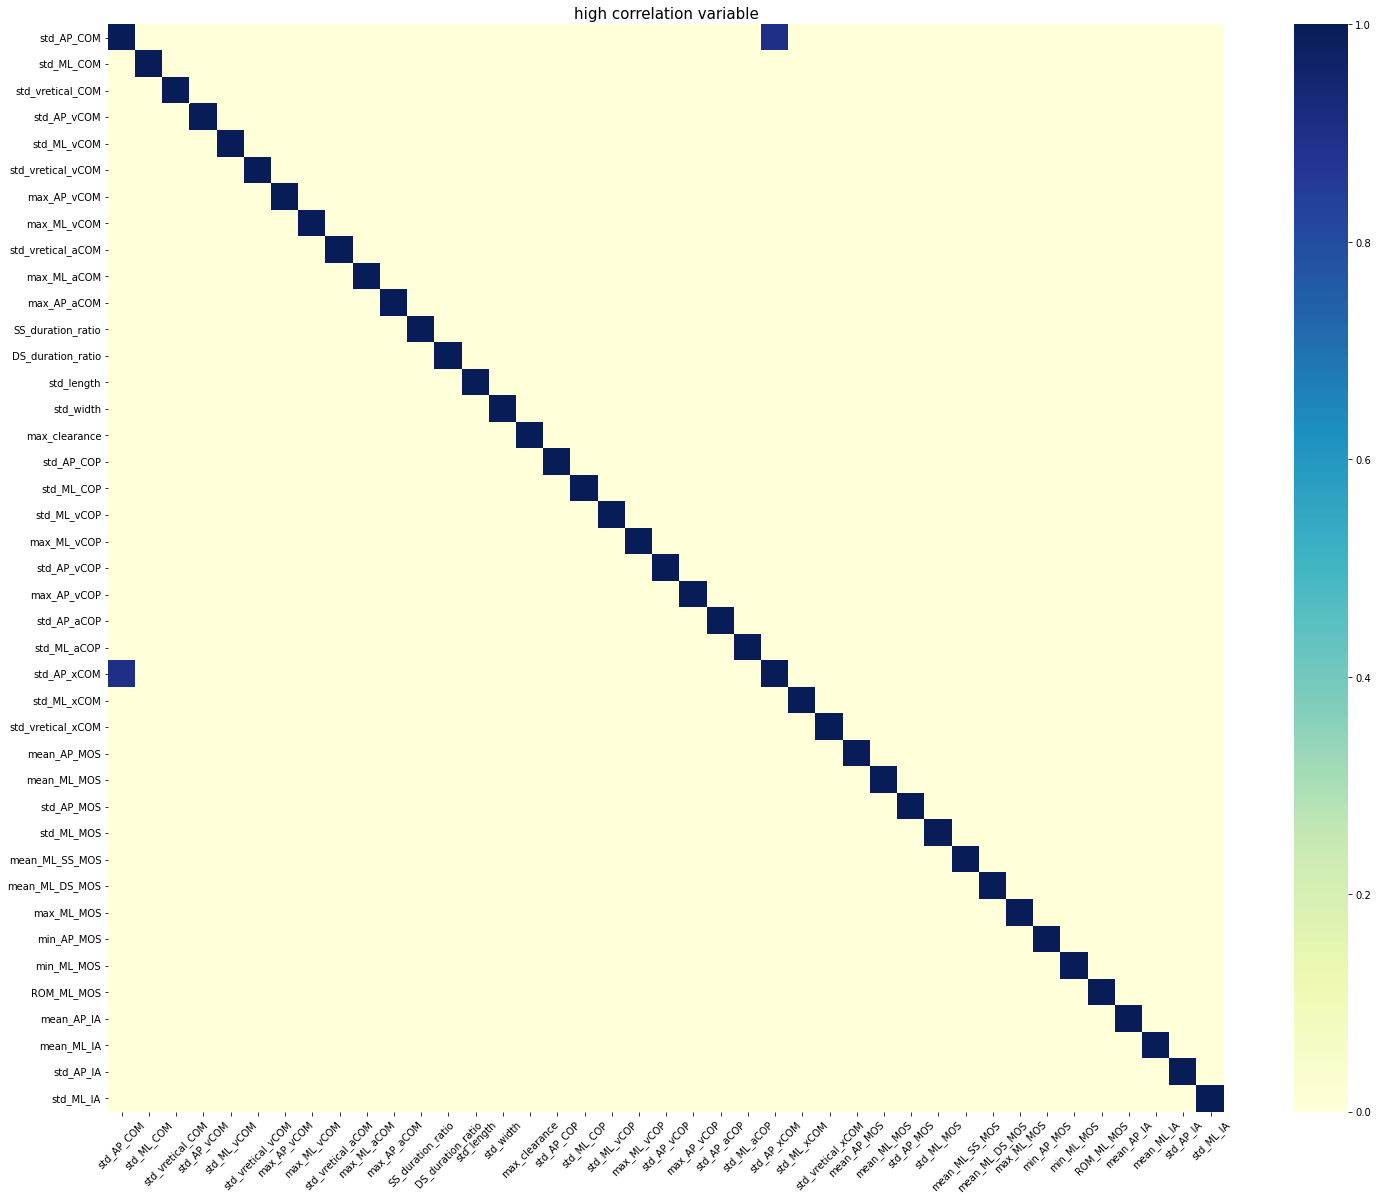

In [353]:
corr_df = all_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

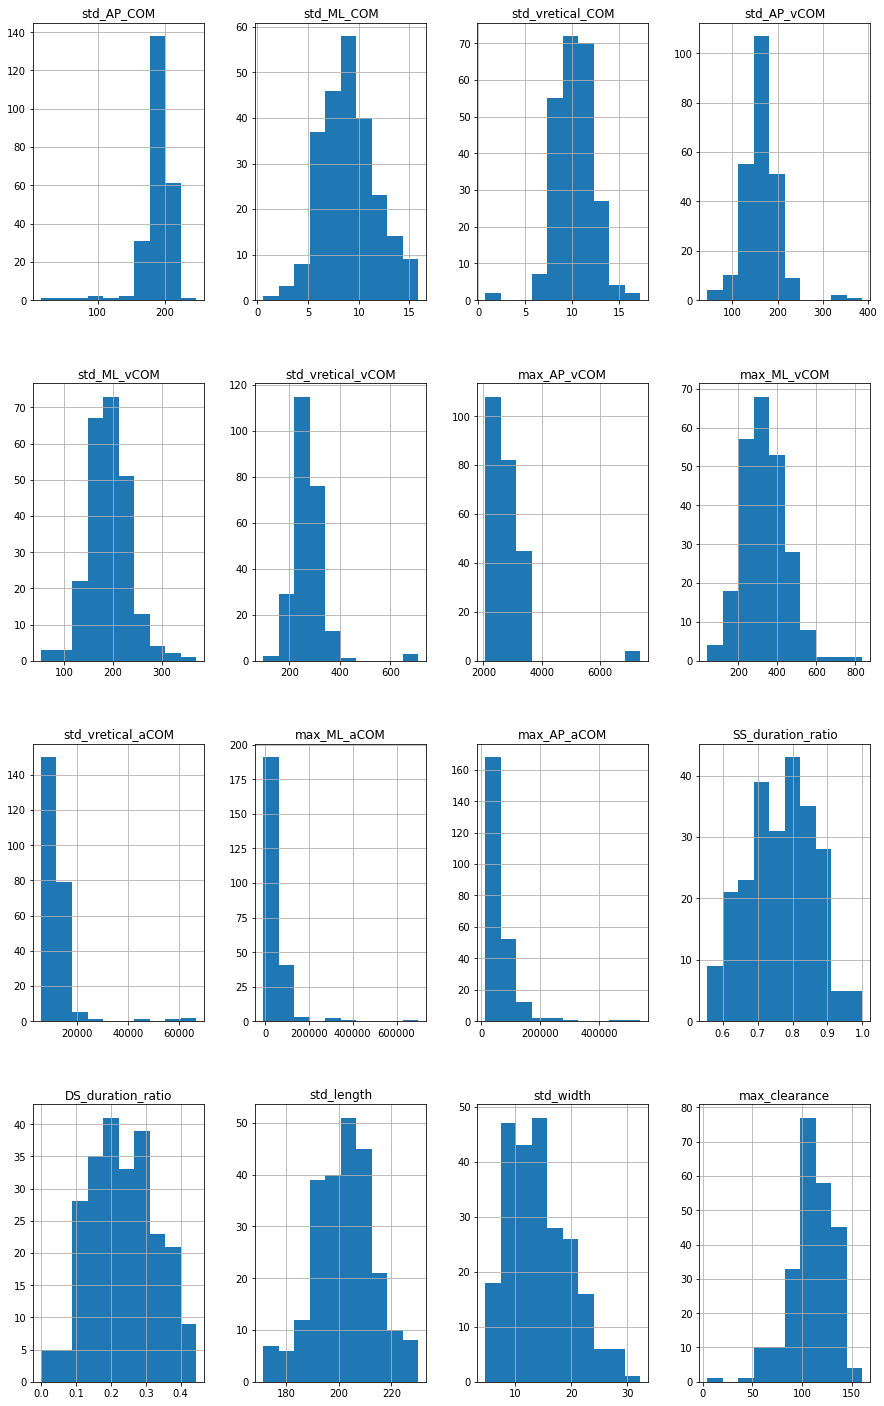

In [354]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [355]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

count      mean       std      min       25%       50%  \
target_performance                                                           
Bad                  58.0  0.790150  0.086922  0.64706  0.725532  0.771225   
Good                 75.0  0.756755  0.095380  0.57895  0.666670  0.769910   
Moderate            106.0  0.760111  0.099306  0.55556  0.685573  0.772810   

                         75%      max  
target_performance                     
Bad                 0.848795  1.00000  
Good                0.827255  0.97030  
Moderate            0.837770  0.94444

## Data processing

In [356]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [357]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [358]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [359]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [360]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [361]:
x_train.shape

(167, 41)

In [362]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 45
Good 52
Moderate 70


In [363]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 13
Good 23
Moderate 36


In [364]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))
spa_cop = spa_para + cop_para
spa_adv = spa_para + advanced
cop_adv = cop_para + advanced
kine_para = spa_para + list(range(24,37))
non_kine_para = cop_para + list(range(37,41))

In [365]:
input_df.columns[37:41]

Index(['mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA'], dtype='object')

In [366]:
all_input_df = input_df
all_input_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA']
spa_input_df = input_df.iloc[:,spa_para]
cop_input_df = input_df.iloc[:,cop_para]
adv_input_df = input_df.iloc[:,advanced]
spa_cop_input_df = input_df.iloc[:,spa_cop]
spa_adv_input_df = input_df.iloc[:,spa_adv]
cop_adv_input_df = input_df.iloc[:,cop_adv]
kine_input_df = input_df.iloc[:,kine_para]
non_kine_input_df = input_df.iloc[:,non_kine_para]

all_x_train = x_train
spa_x_train = x_train[:,spa_para]
cop_x_train = x_train[:,cop_para]
adv_x_train = x_train[:,advanced]
spa_cop_x_train = x_train[:,spa_cop]
spa_adv_x_train = x_train[:,spa_adv]
cop_adv_x_train = x_train[:,cop_adv]
kine_x_train = x_train[:,kine_para]
non_kine_x_train = x_train[:,non_kine_para]

all_x_test = x_test
spa_x_test = x_test[:,spa_para]
cop_x_test = x_test[:,cop_para]
adv_x_test = x_test[:,advanced]
spa_cop_x_test = x_test[:,spa_cop]
spa_adv_x_test = x_test[:,spa_adv]
cop_adv_x_test = x_test[:,cop_adv]
kine_x_test = x_test[:,kine_para]
non_kine_x_test = x_test[:,non_kine_para]

In [367]:
cop_adv_x_train.shape

(167, 25)

## Model training

In [368]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [369]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [370]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [371]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [372]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [373]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [374]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

In [375]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.8194444444444444

In [376]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.7916666666666666

[Text(1140.8000000000002, 2092.8599999999997, 'mean_AP_MOS <= 0.452\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(570.4000000000001, 1712.34, 'std_length <= -0.083\nentropy = 0.979\nsamples = 99\nvalue = [2, 27, 70]\nclass = Bad'),
 Text(285.20000000000005, 1331.82, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(855.6000000000001, 1331.82, 'mean_ML_SS_MOS <= -1.063\nentropy = 1.184\nsamples = 47\nvalue = [2, 27, 18]\nclass = Moderate'),
 Text(570.4000000000001, 951.3, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(1140.8000000000002, 951.3, 'std_vertical_aCOM <= -0.19\nentropy = 0.91\nsamples = 40\nvalue = [0, 27, 13]\nclass = Moderate'),
 Text(855.6000000000001, 570.78, 'std_AP_vCOM <= 0.597\nentropy = 1.0\nsamples = 26\nvalue = [0, 13, 13]\nclass = Moderate'),
 Text(570.4000000000001, 190.26000000000022, 'entropy = 0.934\nsamples = 20\nvalue = [0, 7, 13]\nclass = Bad'),
 Text(1140.8000000000002, 190.26000000

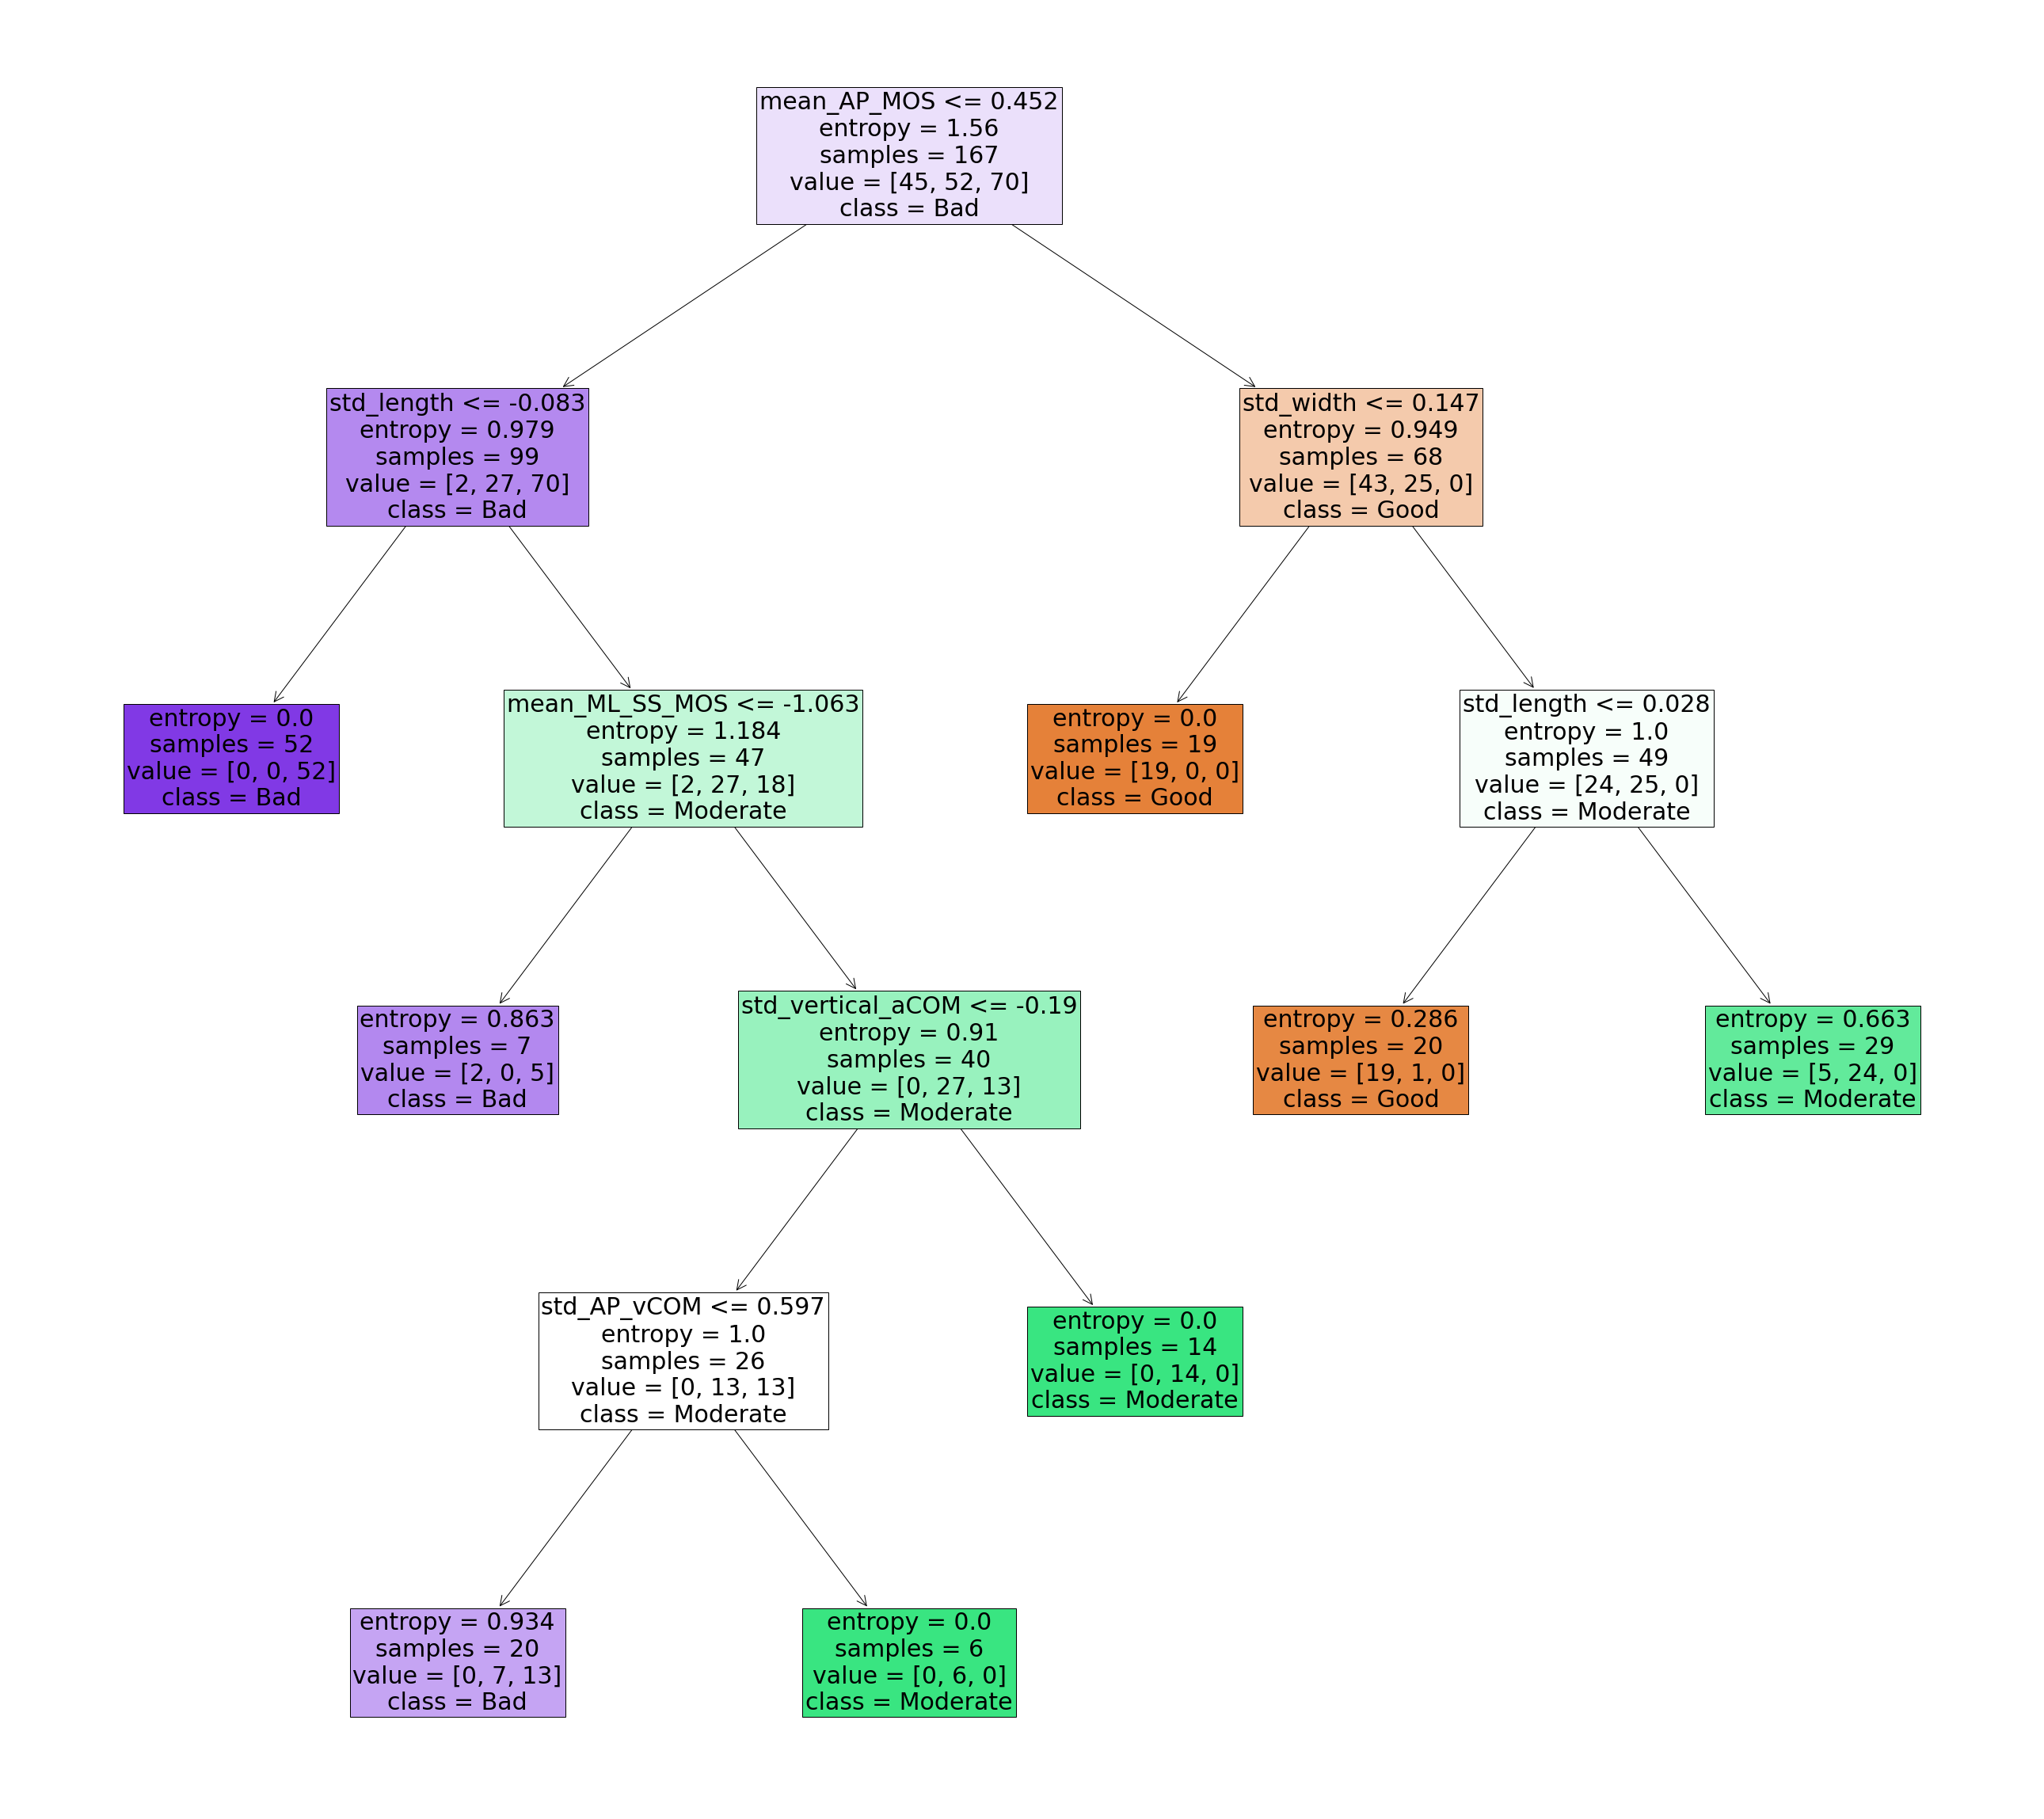

In [377]:
from sklearn import  tree
figure = plt.figure(figsize = (46,42))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
               fontsize=30, 
              filled=True)

[Text(767.25, 1189.125, 'mean_AP_MOS <= 0.452\nentropy = 1.572\nsamples = 108\nvalue = [55, 47, 65]\nclass = Bad'),
 Text(418.5, 849.375, 'std_vertical_vCOM <= 0.604\nentropy = 1.039\nsamples = 64\nvalue = [3, 26, 65]\nclass = Bad'),
 Text(279.0, 509.625, 'std_AP_COP <= 0.17\nentropy = 0.832\nsamples = 54\nvalue = [3, 12, 65]\nclass = Bad'),
 Text(139.5, 169.875, 'entropy = 0.418\nsamples = 38\nvalue = [3, 1, 54]\nclass = Bad'),
 Text(418.5, 169.875, 'entropy = 1.0\nsamples = 16\nvalue = [0, 11, 11]\nclass = Moderate'),
 Text(558.0, 509.625, 'entropy = 0.0\nsamples = 10\nvalue = [0, 14, 0]\nclass = Moderate'),
 Text(1116.0, 849.375, 'std_AP_COM <= 0.417\nentropy = 0.866\nsamples = 44\nvalue = [52, 21, 0]\nclass = Good'),
 Text(837.0, 509.625, 'mean_AP_IA <= -0.134\nentropy = 0.439\nsamples = 26\nvalue = [40, 4, 0]\nclass = Good'),
 Text(697.5, 169.875, 'entropy = 0.0\nsamples = 13\nvalue = [26, 0, 0]\nclass = Good'),
 Text(976.5, 169.875, 'entropy = 0.764\nsamples = 13\nvalue = [14, 4,

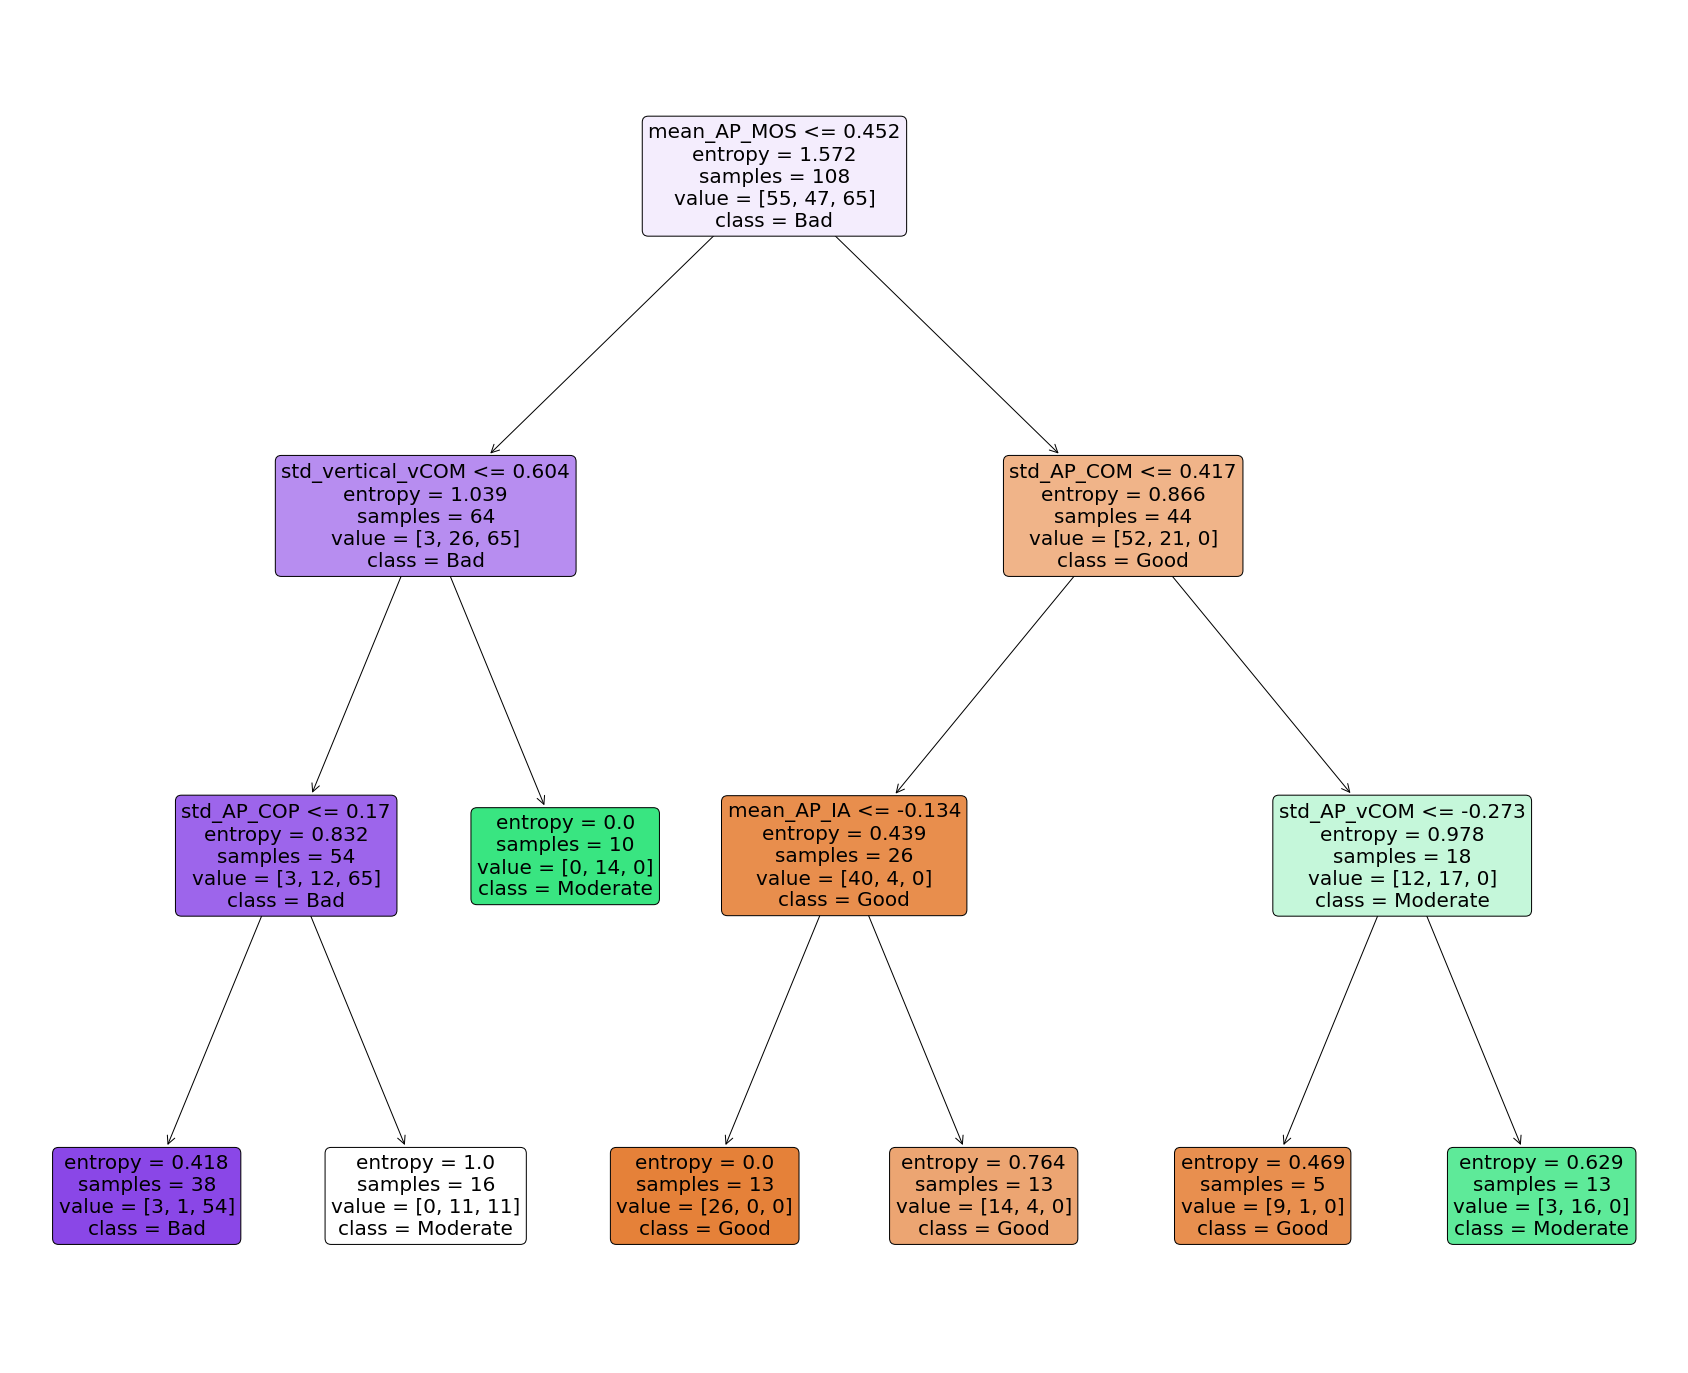

In [378]:
figure = plt.figure(figsize = (30,25))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              fontsize=20, 
              rounded=True)


In [379]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [380]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.833
recall: 0.847
precision: 0.814


Text(0.5, 1.0, 'SVC confusion matrix')

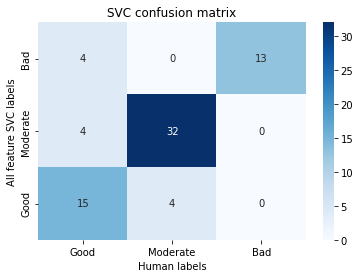

In [381]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [382]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 65.21739130434783 
 Moderate prediction 88.88888888888889 
 Bad prediction 100.0


In [383]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 78.94736842105263 
 Moderate prediction 88.88888888888889 
 Bad prediction 76.47058823529412


In [384]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.819
recall: 0.8
precision: 0.804


Text(0.5, 1.0, 'DT confusion matrix')

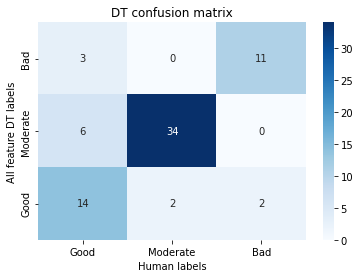

In [385]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [386]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 94.44444444444444 
 Bad prediction 84.61538461538461


In [387]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 85.0 
 Bad prediction 78.57142857142857


In [388]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.792
recall: 0.771
precision: 0.79


Text(0.5, 1.0, 'RF confusion matrix')

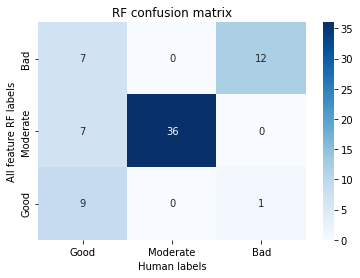

In [389]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [390]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 39.130434782608695 
 Moderate prediction 100.0 
 Bad prediction 92.3076923076923


In [391]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 90.0 
 Moderate prediction 83.72093023255815 
 Bad prediction 63.1578947368421


### spatiotemporal features

In [392]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [393]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [394]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [395]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [396]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.7916666666666666

In [397]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.6666666666666666

In [398]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.7361111111111112

[Text(507.27272727272725, 996.6, 'max_ML_aCOM <= -0.155\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(228.27272727272728, 815.4000000000001, 'std_length <= -0.083\nentropy = 1.043\nsamples = 96\nvalue = [4, 24, 68]\nclass = Bad'),
 Text(101.45454545454545, 634.2, 'std_width <= 0.631\nentropy = 0.235\nsamples = 52\nvalue = [2, 0, 50]\nclass = Bad'),
 Text(50.72727272727273, 453.0, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = Bad'),
 Text(152.1818181818182, 453.0, 'entropy = 0.764\nsamples = 9\nvalue = [2, 0, 7]\nclass = Bad'),
 Text(355.09090909090907, 634.2, 'std_vertical_COM <= 0.872\nentropy = 1.207\nsamples = 44\nvalue = [2, 24, 18]\nclass = Moderate'),
 Text(253.63636363636363, 453.0, 'std_vertical_aCOM <= -0.085\nentropy = 1.235\nsamples = 28\nvalue = [2, 9, 17]\nclass = Bad'),
 Text(202.9090909090909, 271.79999999999995, 'std_vertical_COM <= 0.215\nentropy = 0.931\nsamples = 26\nvalue = [0, 9, 17]\nclass = Bad'),
 Text(152.1818181818182, 

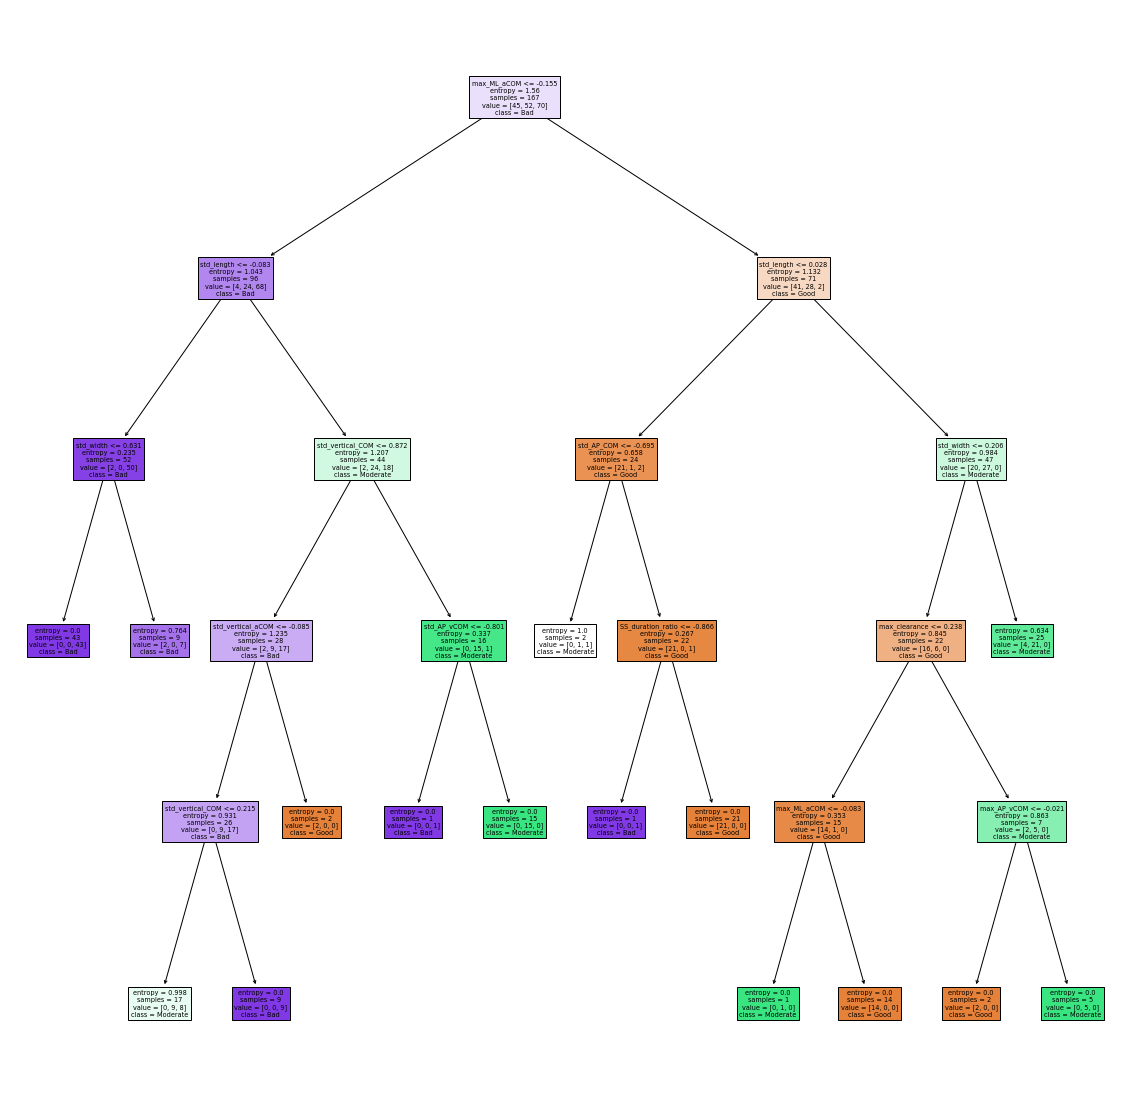

In [399]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_ML_aCOM <= -0.224\ngini = 0.644\nsamples = 106\nvalue = [42, 49, 76]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_vCOM <= 0.617\ngini = 0.396\nsamples = 54\nvalue = [1, 24, 69]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_vCOM <= -2.376\ngini = 0.193\nsamples = 44\nvalue = [1, 7, 67]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.444\nsamples = 2\nvalue = [1, 2, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.129\nsamples = 42\nvalue = [0, 5, 67]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_AP_vCOM <= -0.801\ngini = 0.188\nsamples = 10\nvalue = [0, 17, 2]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 9\nvalue = [0, 17, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_length <= 0.194\ngini = 0.558\nsamples = 52\nvalue = [41, 25, 7]\nclass = Good'),
 Text(697.5, 407.7000

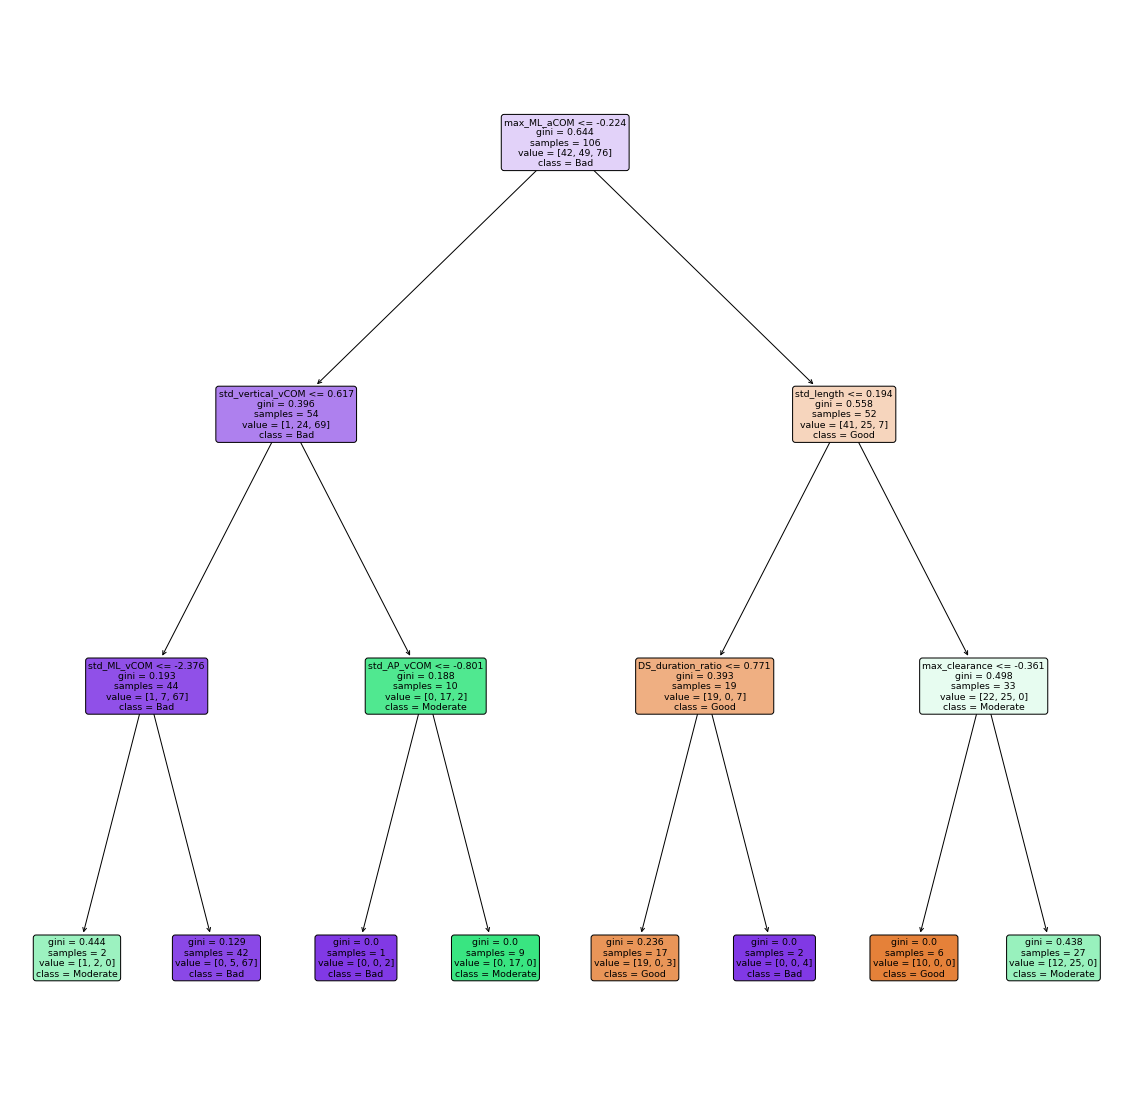

In [400]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [401]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [402]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.792
recall: 0.754
precision: 0.748


Text(0.5, 1.0, 'SVC confusion matrix')

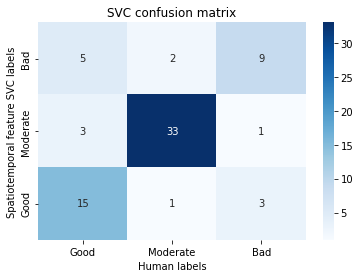

In [403]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [404]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 65.21739130434783 
 Moderate prediction 91.66666666666666 
 Bad prediction 69.23076923076923


In [405]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 78.94736842105263 
 Moderate prediction 89.1891891891892 
 Bad prediction 56.25


In [406]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.667
recall: 0.643
precision: 0.646


Text(0.5, 1.0, 'DT confusion matrix')

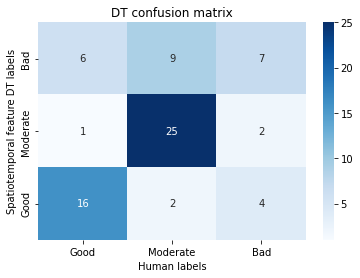

In [407]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [408]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 69.56521739130434 
 Moderate prediction 69.44444444444444 
 Bad prediction 53.84615384615385


In [409]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 72.72727272727273 
 Moderate prediction 89.28571428571429 
 Bad prediction 31.818181818181817


In [410]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.736
recall: 0.722
precision: 0.704


Text(0.5, 1.0, 'RF confusion matrix')

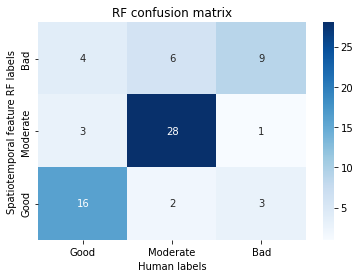

In [411]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [412]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 69.56521739130434 
 Moderate prediction 77.77777777777779 
 Bad prediction 69.23076923076923


In [413]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 76.19047619047619 
 Moderate prediction 87.5 
 Bad prediction 47.368421052631575


### cop features

In [414]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [415]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [416]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [417]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [418]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [419]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6527777777777778

In [420]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.625

[Text(496.0, 978.48, 'std_AP_aCOP <= -0.271\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 761.0400000000001, 'std_ML_vCOP <= -1.317\nentropy = 1.282\nsamples = 94\nvalue = [9, 28, 57]\nclass = Bad'),
 Text(124.0, 543.6, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7, 0]\nclass = Moderate'),
 Text(372.0, 543.6, 'std_AP_COP <= -1.223\nentropy = 1.152\nsamples = 84\nvalue = [6, 21, 57]\nclass = Bad'),
 Text(248.0, 326.1600000000001, 'std_AP_COP <= -1.377\nentropy = 1.379\nsamples = 7\nvalue = [2, 4, 1]\nclass = Moderate'),
 Text(124.0, 108.72000000000003, 'entropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = Good'),
 Text(372.0, 108.72000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Moderate'),
 Text(496.0, 326.1600000000001, 'entropy = 1.037\nsamples = 77\nvalue = [4, 17, 56]\nclass = Bad'),
 Text(744.0, 761.0400000000001, 'std_AP_vCOP <= -0.136\nentropy = 1.474\nsamples = 73\nvalue = [36, 24, 13]\nclass = Good'),
 Text(620.0, 5

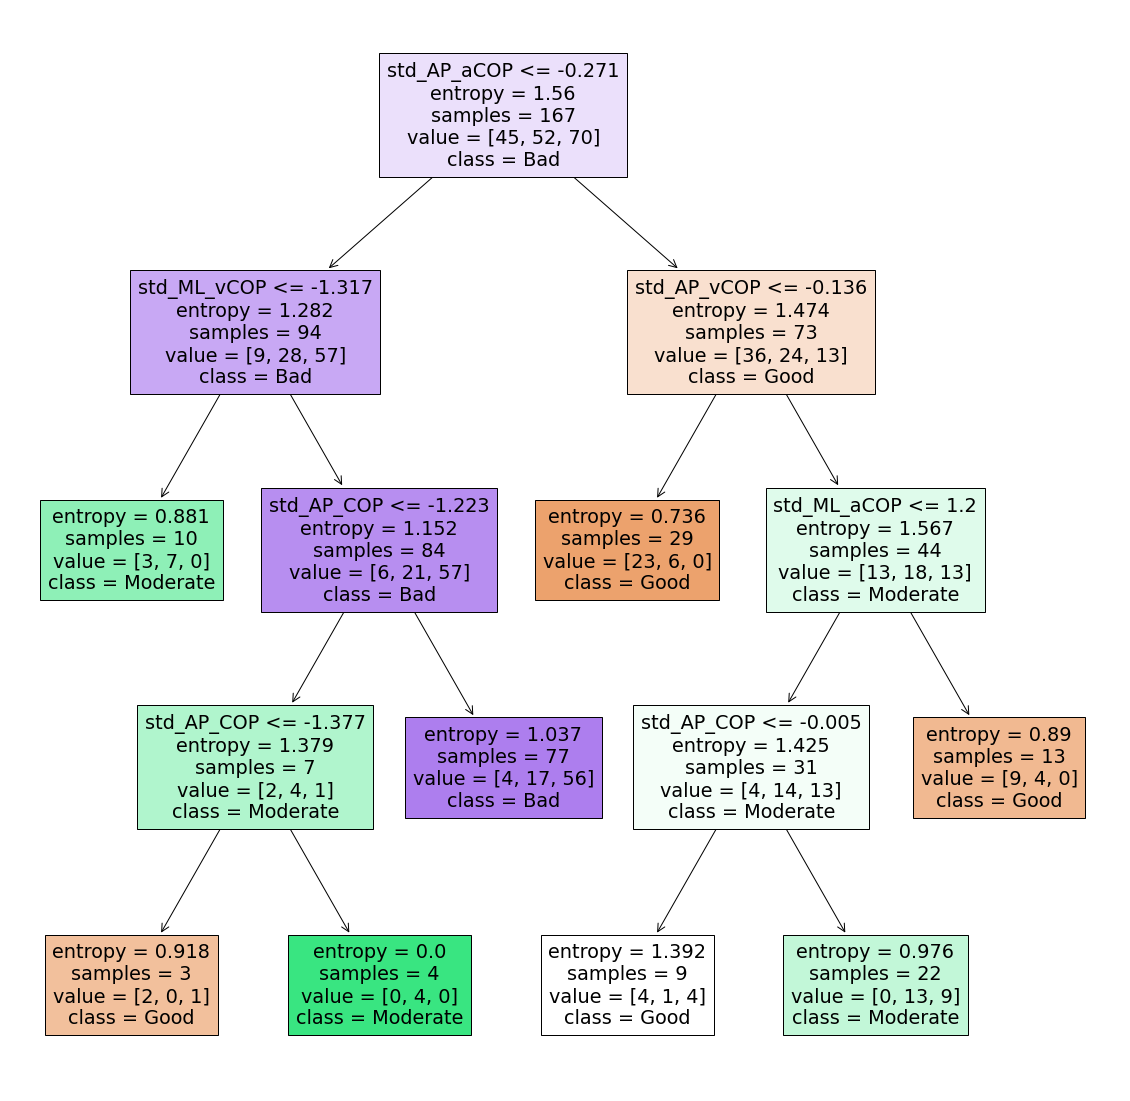

In [421]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_AP_vCOP <= -0.081\ngini = 0.654\nsamples = 104\nvalue = [42, 56, 69]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_aCOP <= -0.305\ngini = 0.616\nsamples = 74\nvalue = [19, 42, 56]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_AP_vCOP <= -0.386\ngini = 0.529\nsamples = 51\nvalue = [7, 26, 51]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 5, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.505\nsamples = 49\nvalue = [7, 21, 51]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'max_AP_vCOP <= -0.215\ngini = 0.61\nsamples = 23\nvalue = [12, 16, 5]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.528\nsamples = 19\nvalue = [12, 15, 1]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'gini = 0.32\nsamples = 4\nvalue = [0, 1, 4]\nclass = Bad'),
 Text(837.0, 679.5, 'std_ML_COP <= -0.358\ngini = 0.642\nsamples = 30\nvalue = [23, 14, 13]\nclass = Good'),
 Text(697.5, 407.7

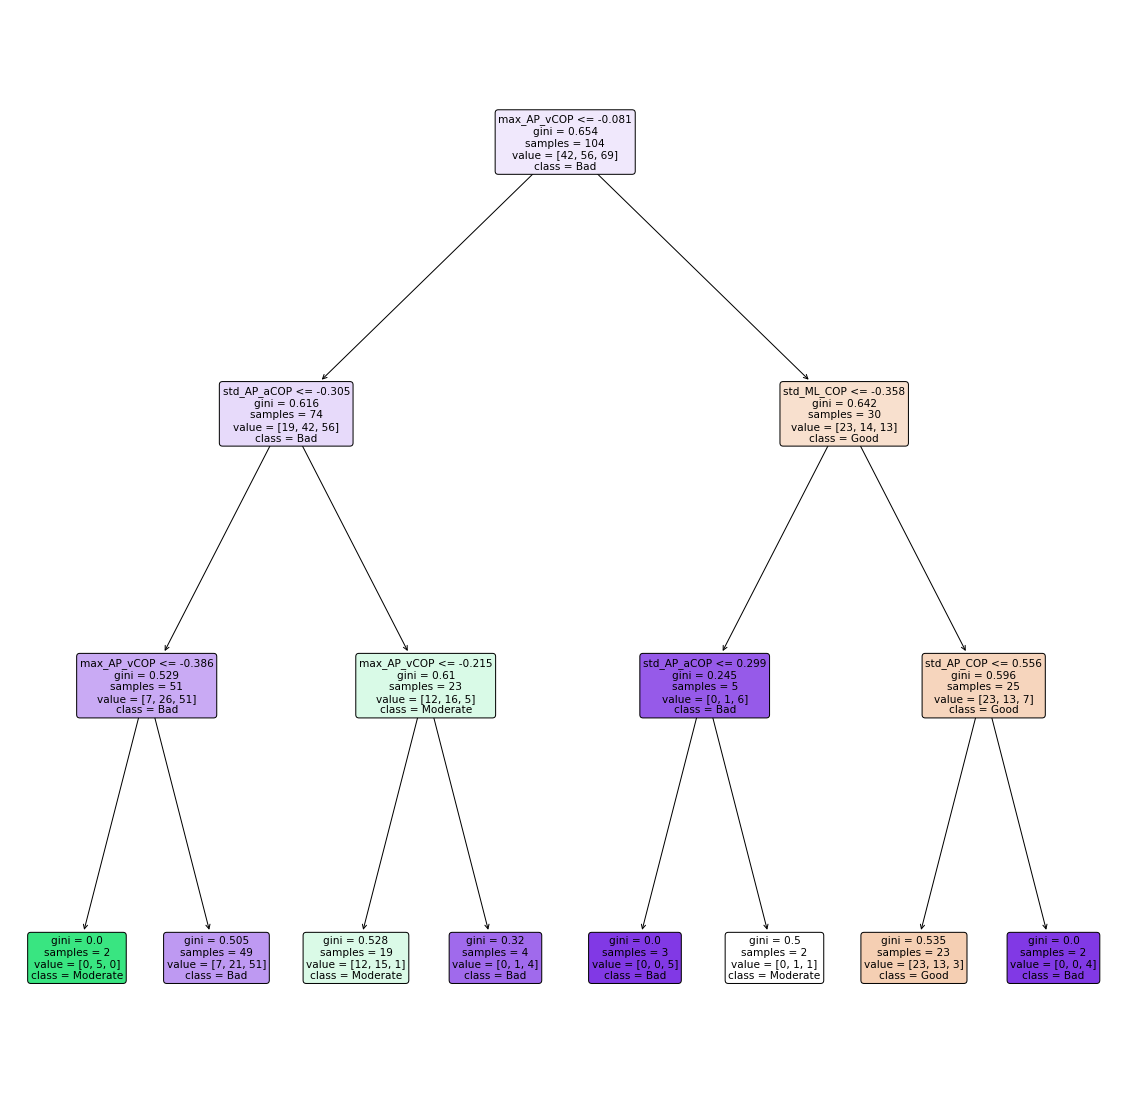

In [422]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [423]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [424]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.611
recall: 0.554
precision: 0.527


Text(0.5, 1.0, 'SVC confusion matrix')

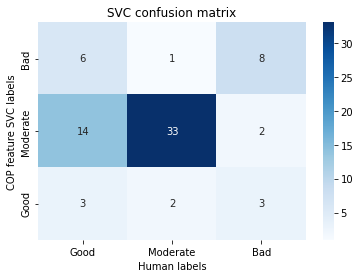

In [425]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [426]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 13.043478260869565 
 Moderate prediction 91.66666666666666 
 Bad prediction 61.53846153846154


In [427]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 37.5 
 Moderate prediction 67.3469387755102 
 Bad prediction 53.333333333333336


In [428]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.653
recall: 0.684
precision: 0.628


Text(0.5, 1.0, 'DT confusion matrix')

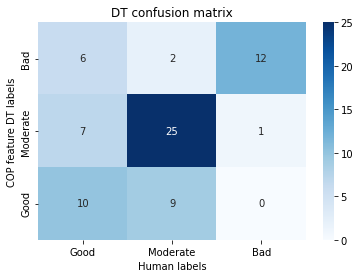

In [429]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [430]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 69.44444444444444 
 Bad prediction 92.3076923076923


In [431]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 52.63157894736842 
 Moderate prediction 75.75757575757575 
 Bad prediction 60.0


In [432]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.625
recall: 0.617
precision: 0.594


Text(0.5, 1.0, 'RF confusion matrix')

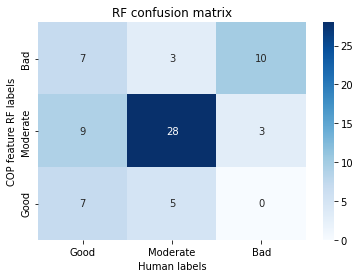

In [433]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [434]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 30.434782608695656 
 Moderate prediction 77.77777777777779 
 Bad prediction 76.92307692307693


In [435]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 58.333333333333336 
 Moderate prediction 70.0 
 Bad prediction 50.0


### advanced features

In [436]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 1.2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [437]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 15}

In [438]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [439]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [440]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.75

In [441]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.7638888888888888

In [442]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.7083333333333334

[Text(558.0, 951.3000000000001, 'mean_AP_MOS <= 0.452\ngini = 0.655\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_xCOM <= 1.217\ngini = 0.425\nsamples = 99\nvalue = [2, 27, 70]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'mean_AP_MOS <= -0.883\ngini = 0.309\nsamples = 76\nvalue = [2, 12, 62]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.576\nsamples = 19\nvalue = [2, 10, 7]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.068\nsamples = 57\nvalue = [0, 2, 55]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'mean_ML_MOS <= -0.271\ngini = 0.454\nsamples = 23\nvalue = [0, 15, 8]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.198\nsamples = 9\nvalue = [0, 1, 8]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_xCOM <= 0.355\ngini = 0.465\nsamples = 68\nvalue = [43, 25, 0]\nclass = Good'),
 Text(697.5, 40

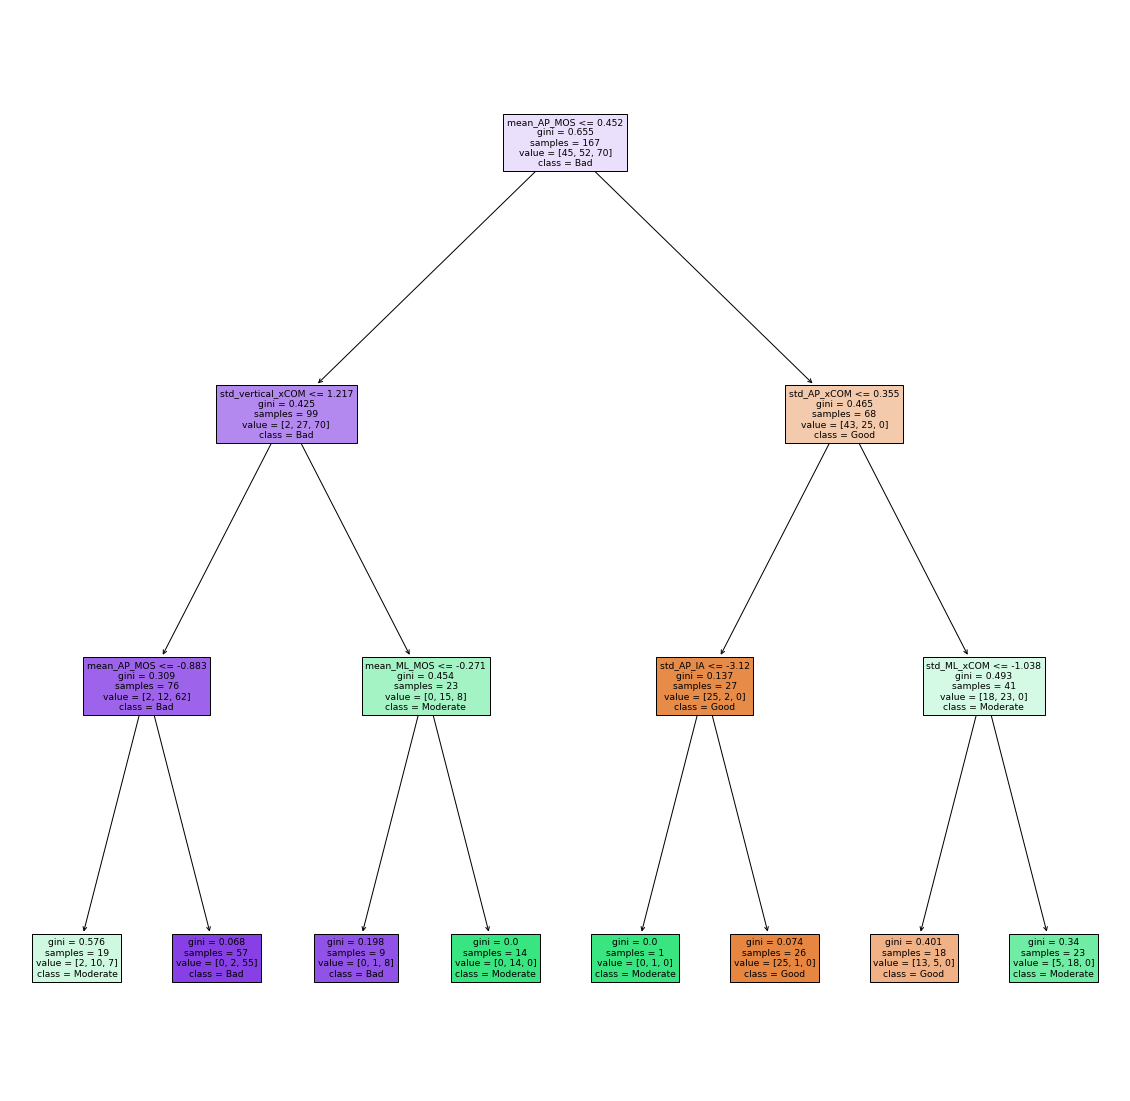

In [443]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_ML_xCOM <= -0.161\ngini = 0.643\nsamples = 100\nvalue = [39, 53, 75]\nclass = Bad'),
 Text(279.0, 679.5, 'std_ML_xCOM <= -1.079\ngini = 0.558\nsamples = 51\nvalue = [37, 36, 5]\nclass = Good'),
 Text(139.5, 407.70000000000005, 'min_ML_MOS <= 0.836\ngini = 0.245\nsamples = 16\nvalue = [18, 3, 0]\nclass = Good'),
 Text(69.75, 135.89999999999998, 'gini = 0.1\nsamples = 15\nvalue = [18, 1, 0]\nclass = Good'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'std_vertical_xCOM <= -1.207\ngini = 0.546\nsamples = 35\nvalue = [19, 33, 5]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 6\nvalue = [11, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.443\nsamples = 29\nvalue = [8, 33, 5]\nclass = Moderate'),
 Text(837.0, 679.5, 'mean_AP_MOS <= -0.773\ngini = 0.344\nsamples = 49\nvalue = [2, 17, 70]\nclass = Bad'),
 Text(697.5, 407

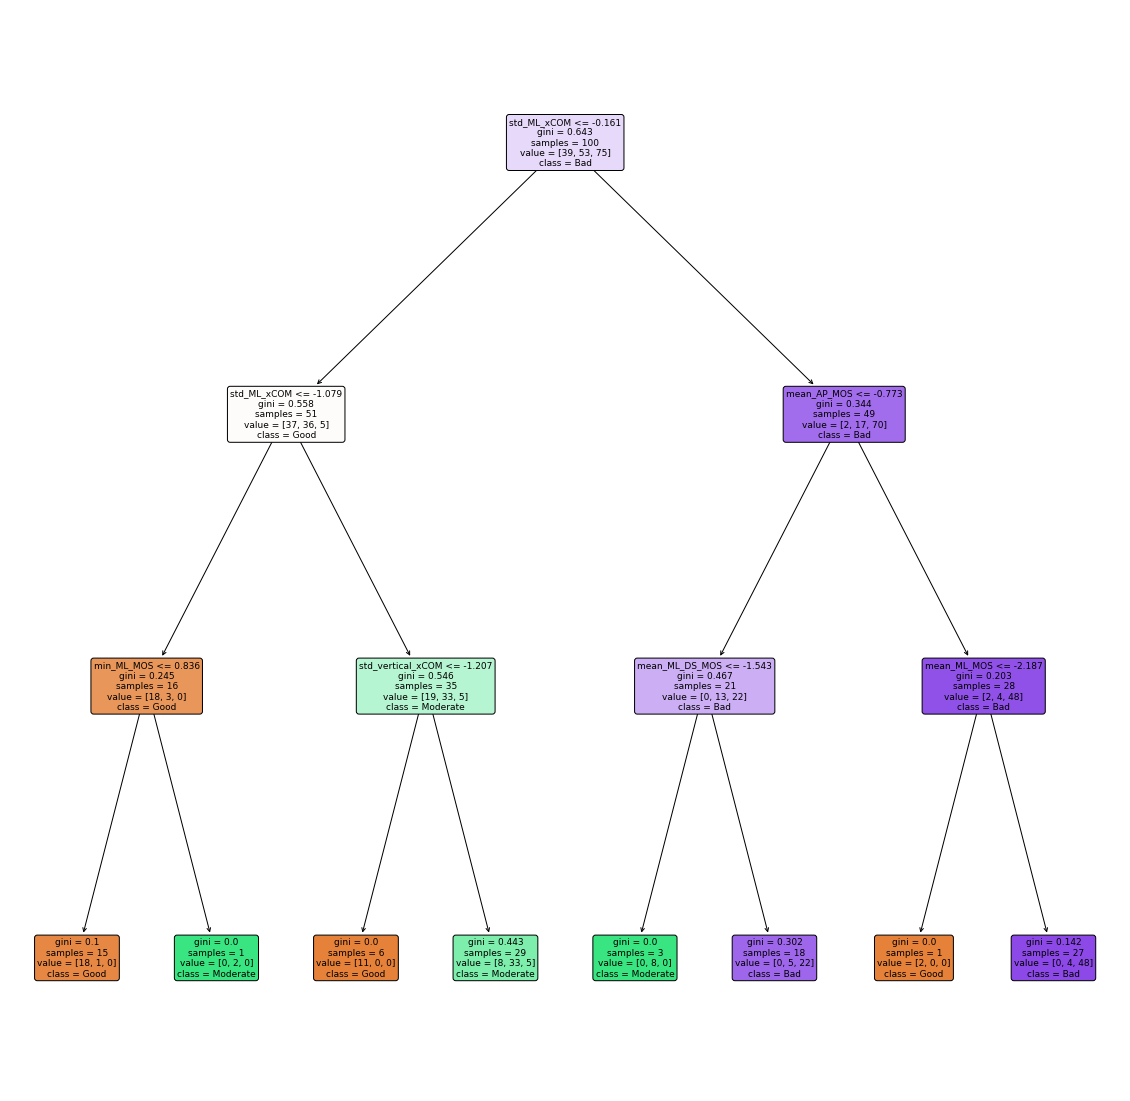

In [444]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [445]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [446]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.75
recall: 0.721
precision: 0.713


Text(0.5, 1.0, 'SVC confusion matrix')

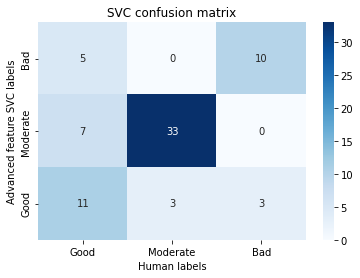

In [447]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [448]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 91.66666666666666 
 Bad prediction 76.92307692307693


In [449]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 64.70588235294117 
 Moderate prediction 82.5 
 Bad prediction 66.66666666666666


In [450]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.764
recall: 0.741
precision: 0.72


Text(0.5, 1.0, 'DT confusion matrix')

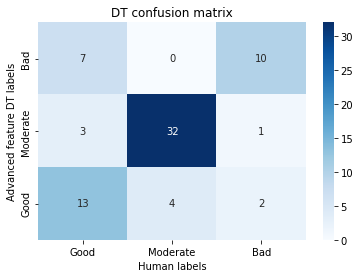

In [451]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [452]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 56.52173913043478 
 Moderate prediction 88.88888888888889 
 Bad prediction 76.92307692307693


In [453]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 68.42105263157895 
 Moderate prediction 88.88888888888889 
 Bad prediction 58.82352941176471


In [454]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.708
recall: 0.696
precision: 0.78


Text(0.5, 1.0, 'RF confusion matrix')

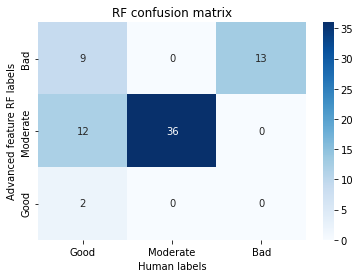

In [455]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [456]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 8.695652173913043 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [457]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 100.0 
 Moderate prediction 75.0 
 Bad prediction 59.09090909090909


### spa cop features

In [458]:
spa_cop_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_cop_SVC_grid_search.fit(spa_cop_x_train, y_train.ravel())
spa_cop_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [459]:
spa_cop_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_cop_DT_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9}

In [460]:
spa_cop_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_cop_RF_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [461]:
spa_cop_SVC_best_reg = spa_cop_SVC_grid_search.best_estimator_
spa_cop_DT_best_reg = spa_cop_DT_grid_search.best_estimator_
spa_cop_RF_best_reg = spa_cop_RF_grid_search.best_estimator_

In [462]:
spa_cop_SVC_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7638888888888888

In [463]:
spa_cop_DT_best_reg.score(spa_cop_x_test, y_test.ravel())

0.6388888888888888

In [464]:
spa_cop_RF_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7361111111111112

[Text(472.15384615384613, 978.48, 'max_ML_aCOM <= -0.155\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'std_length <= -0.083\nentropy = 1.043\nsamples = 96\nvalue = [4, 24, 68]\nclass = Bad'),
 Text(85.84615384615384, 543.6, 'entropy = 0.235\nsamples = 52\nvalue = [2, 0, 50]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'std_vertical_COM <= 0.872\nentropy = 1.207\nsamples = 44\nvalue = [2, 24, 18]\nclass = Moderate'),
 Text(171.69230769230768, 326.1600000000001, 'std_vertical_aCOM <= -0.085\nentropy = 1.235\nsamples = 28\nvalue = [2, 9, 17]\nclass = Bad'),
 Text(85.84615384615384, 108.72000000000003, 'entropy = 0.931\nsamples = 26\nvalue = [0, 9, 17]\nclass = Bad'),
 Text(257.53846153846155, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(343.38461538461536, 326.1600000000001, 'entropy = 0.337\nsamples = 16\nvalue = [0, 15, 1]\nclass = Moderate'),
 Text(772.6153846153845, 76

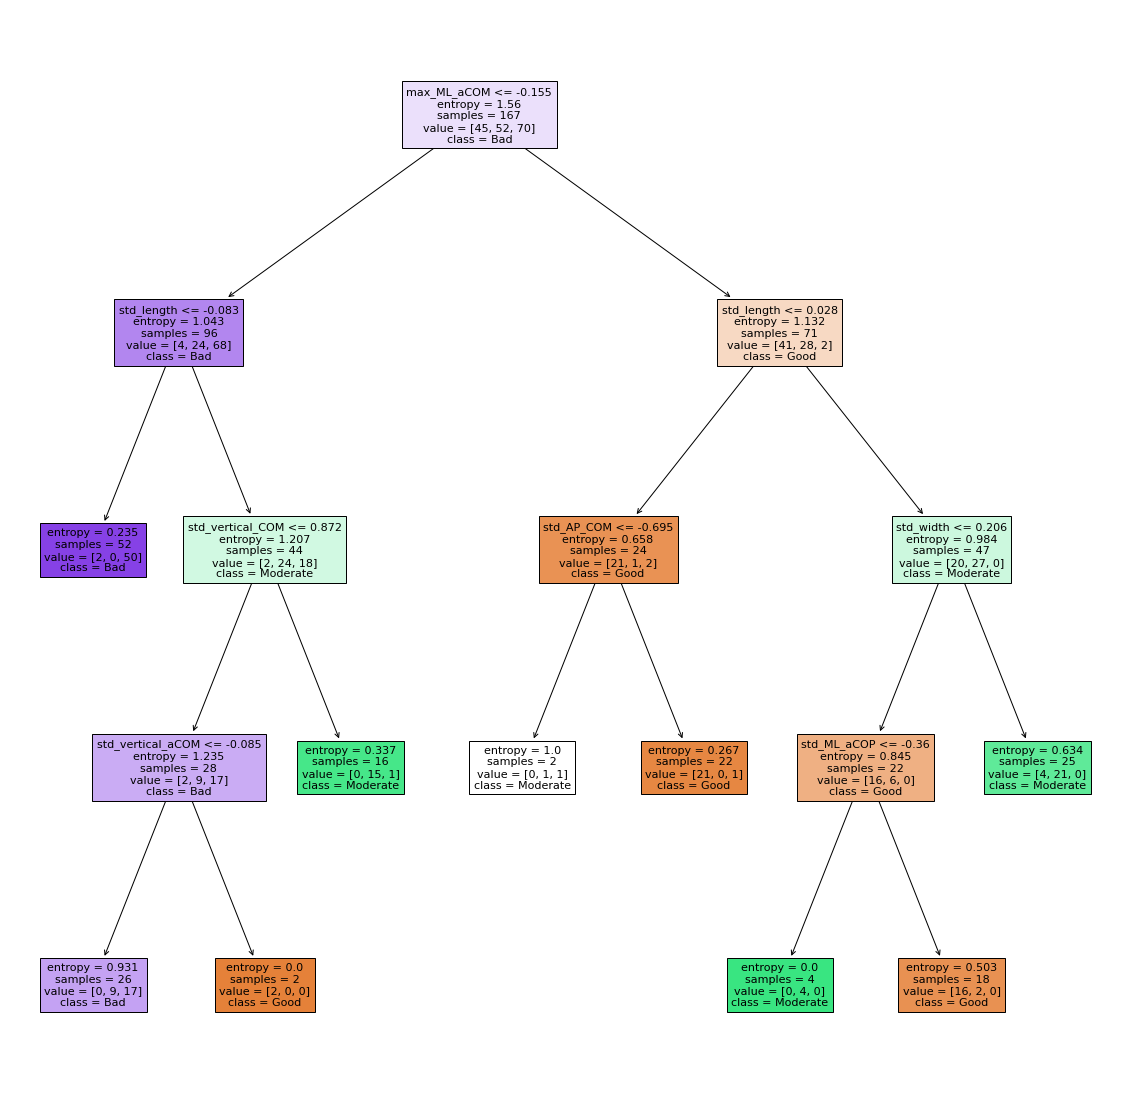

In [465]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_DT_best_reg, 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_vertical_aCOM <= -0.097\nentropy = 1.559\nsamples = 103\nvalue = [48, 48, 71]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_COM <= -0.434\nentropy = 1.152\nsamples = 61\nvalue = [9, 21, 69]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_AP_aCOM <= 0.293\nentropy = 0.477\nsamples = 27\nvalue = [4, 0, 35]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.183\nsamples = 25\nvalue = [1, 0, 35]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [3, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_vertical_aCOM <= -0.389\nentropy = 1.293\nsamples = 34\nvalue = [5, 21, 34]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'entropy = 0.742\nsamples = 11\nvalue = [0, 15, 4]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'entropy = 1.106\nsamples = 23\nvalue = [5, 6, 30]\nclass = Bad'),
 Text(837.0, 679.5, 'SS_duration_ratio <= -1.296\nentropy = 1.139\nsamples = 42\nvalue = [39, 27

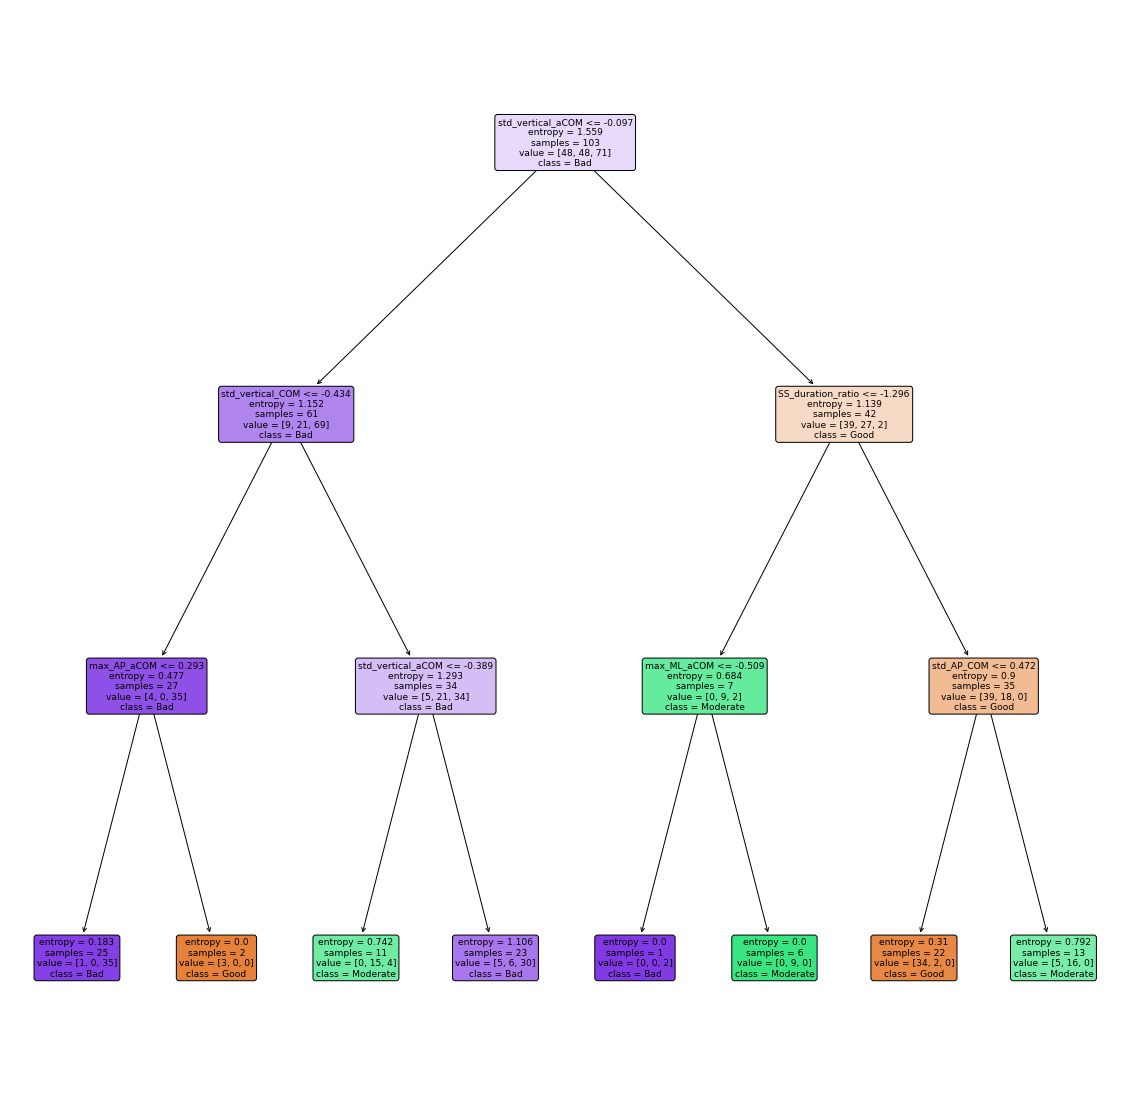

In [466]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_RF_best_reg.estimators_[0], 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [467]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [468]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop SVC
acc: 0.764
recall: 0.702
precision: 0.707


Text(0.5, 1.0, 'SVC confusion matrix')

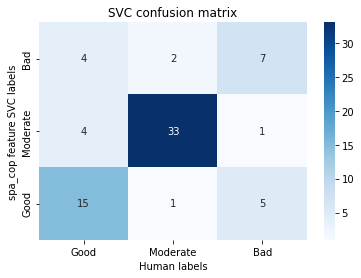

In [469]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [470]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature SVC Sensitivity: 
 Good prediction: 65.21739130434783 
 Moderate prediction 91.66666666666666 
 Bad prediction 53.84615384615385


In [471]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature SVC Precision: 
 Good prediction: 71.42857142857143 
 Moderate prediction 86.8421052631579 
 Bad prediction 53.84615384615385


In [472]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop DT
acc: 0.639
recall: 0.642
precision: 0.655


Text(0.5, 1.0, 'DT confusion matrix')

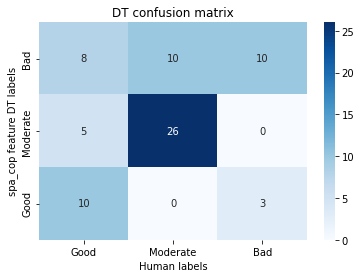

In [473]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [474]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature DT Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 72.22222222222221 
 Bad prediction 76.92307692307693


In [475]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature DT Precision: 
 Good prediction: 76.92307692307693 
 Moderate prediction 83.87096774193549 
 Bad prediction 35.714285714285715


In [476]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop RF
acc: 0.736
recall: 0.734
precision: 0.745


Text(0.5, 1.0, 'RF confusion matrix')

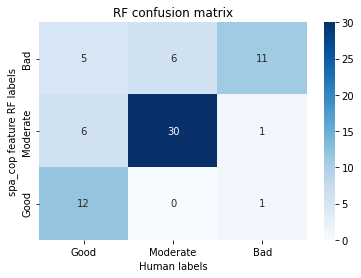

In [477]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [478]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature RF Sensitivity: 
 Good prediction: 52.17391304347826 
 Moderate prediction 83.33333333333334 
 Bad prediction 84.61538461538461


In [479]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature RF Precision: 
 Good prediction: 92.3076923076923 
 Moderate prediction 81.08108108108108 
 Bad prediction 50.0


### spa adv features

In [480]:
spa_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_adv_SVC_grid_search.fit(spa_adv_x_train, y_train.ravel())
spa_adv_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [481]:
spa_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_adv_DT_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [482]:
spa_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_adv_RF_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 300}

In [483]:
spa_adv_SVC_best_reg = spa_adv_SVC_grid_search.best_estimator_
spa_adv_DT_best_reg = spa_adv_DT_grid_search.best_estimator_
spa_adv_RF_best_reg = spa_adv_RF_grid_search.best_estimator_

In [484]:
spa_adv_SVC_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8194444444444444

In [485]:
spa_adv_DT_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8194444444444444

In [486]:
spa_adv_RF_best_reg.score(spa_adv_x_test, y_test.ravel())

0.7916666666666666

[Text(496.0, 996.6, 'mean_AP_MOS <= 0.452\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 815.4000000000001, 'std_length <= -0.083\nentropy = 0.979\nsamples = 99\nvalue = [2, 27, 70]\nclass = Bad'),
 Text(124.0, 634.2, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(372.0, 634.2, 'mean_ML_SS_MOS <= -1.063\nentropy = 1.184\nsamples = 47\nvalue = [2, 27, 18]\nclass = Moderate'),
 Text(248.0, 453.0, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(496.0, 453.0, 'std_vertical_aCOM <= -0.19\nentropy = 0.91\nsamples = 40\nvalue = [0, 27, 13]\nclass = Moderate'),
 Text(372.0, 271.79999999999995, 'std_AP_vCOM <= 0.597\nentropy = 1.0\nsamples = 26\nvalue = [0, 13, 13]\nclass = Moderate'),
 Text(248.0, 90.59999999999991, 'entropy = 0.934\nsamples = 20\nvalue = [0, 7, 13]\nclass = Bad'),
 Text(496.0, 90.59999999999991, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(620.0, 271.79999999999995, 

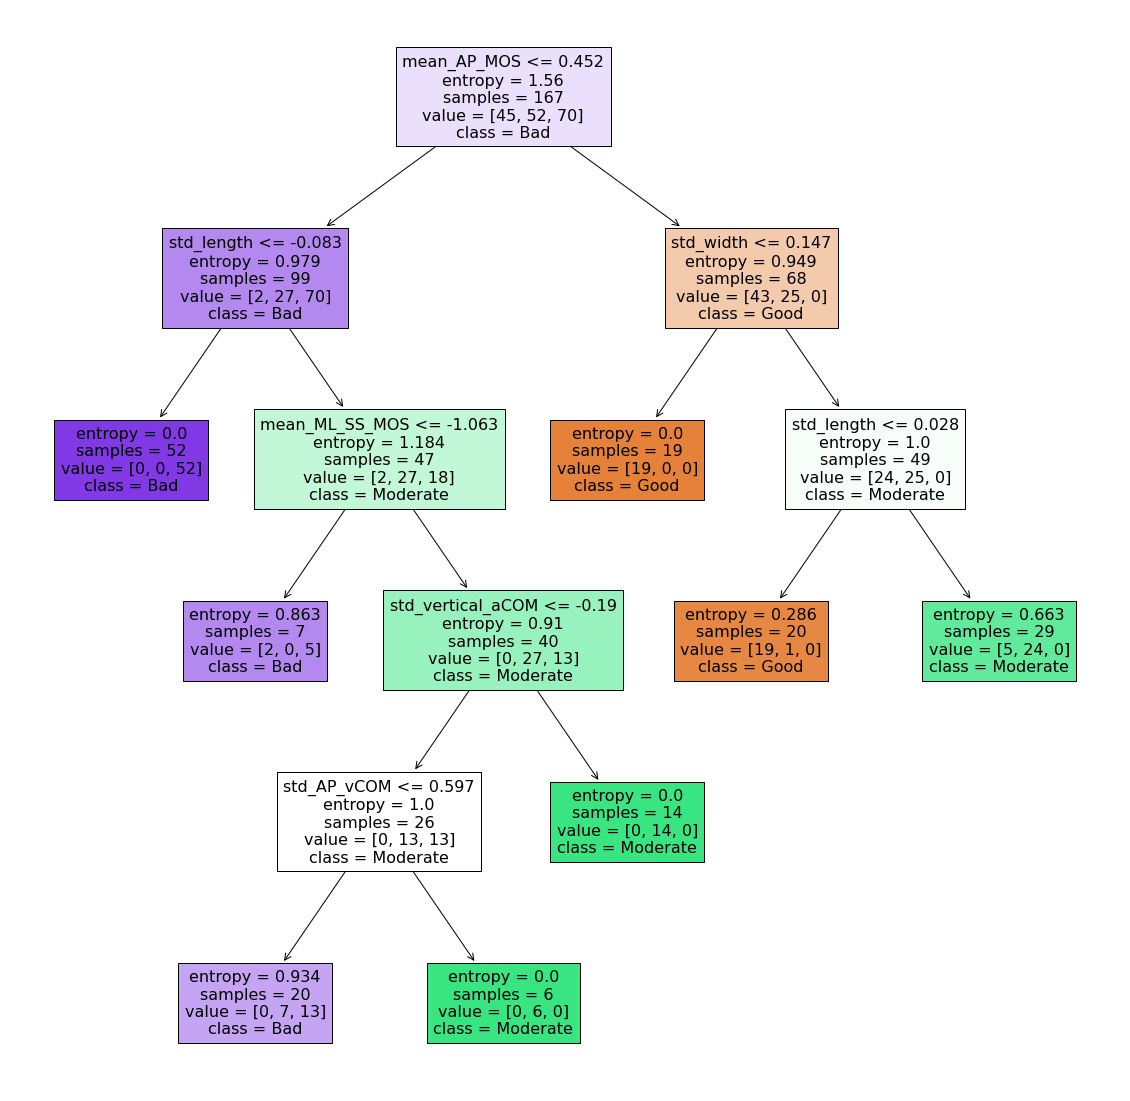

In [487]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_DT_best_reg, 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'max_ML_MOS <= -0.164\ngini = 0.656\nsamples = 103\nvalue = [44, 55, 68]\nclass = Bad'),
 Text(372.0, 679.5, 'DS_duration_ratio <= -1.019\ngini = 0.383\nsamples = 45\nvalue = [2, 17, 58]\nclass = Bad'),
 Text(186.0, 407.70000000000005, 'ROM_ML_MOS <= -1.573\ngini = 0.32\nsamples = 6\nvalue = [2, 8, 0]\nclass = Moderate'),
 Text(93.0, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]\nclass = Good'),
 Text(279.0, 135.89999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 8, 0]\nclass = Moderate'),
 Text(558.0, 407.70000000000005, 'std_vertical_aCOM <= -0.06\ngini = 0.233\nsamples = 39\nvalue = [0, 9, 58]\nclass = Bad'),
 Text(465.0, 135.89999999999998, 'gini = 0.123\nsamples = 35\nvalue = [0, 4, 57]\nclass = Bad'),
 Text(651.0, 135.89999999999998, 'gini = 0.278\nsamples = 4\nvalue = [0, 5, 1]\nclass = Moderate'),
 Text(837.0, 679.5, 'min_ML_MOS <= -1.906\ngini = 0.592\nsamples = 58\nvalue = [42, 38, 10]\nclass = Good'),
 Text(744.0, 407.70000

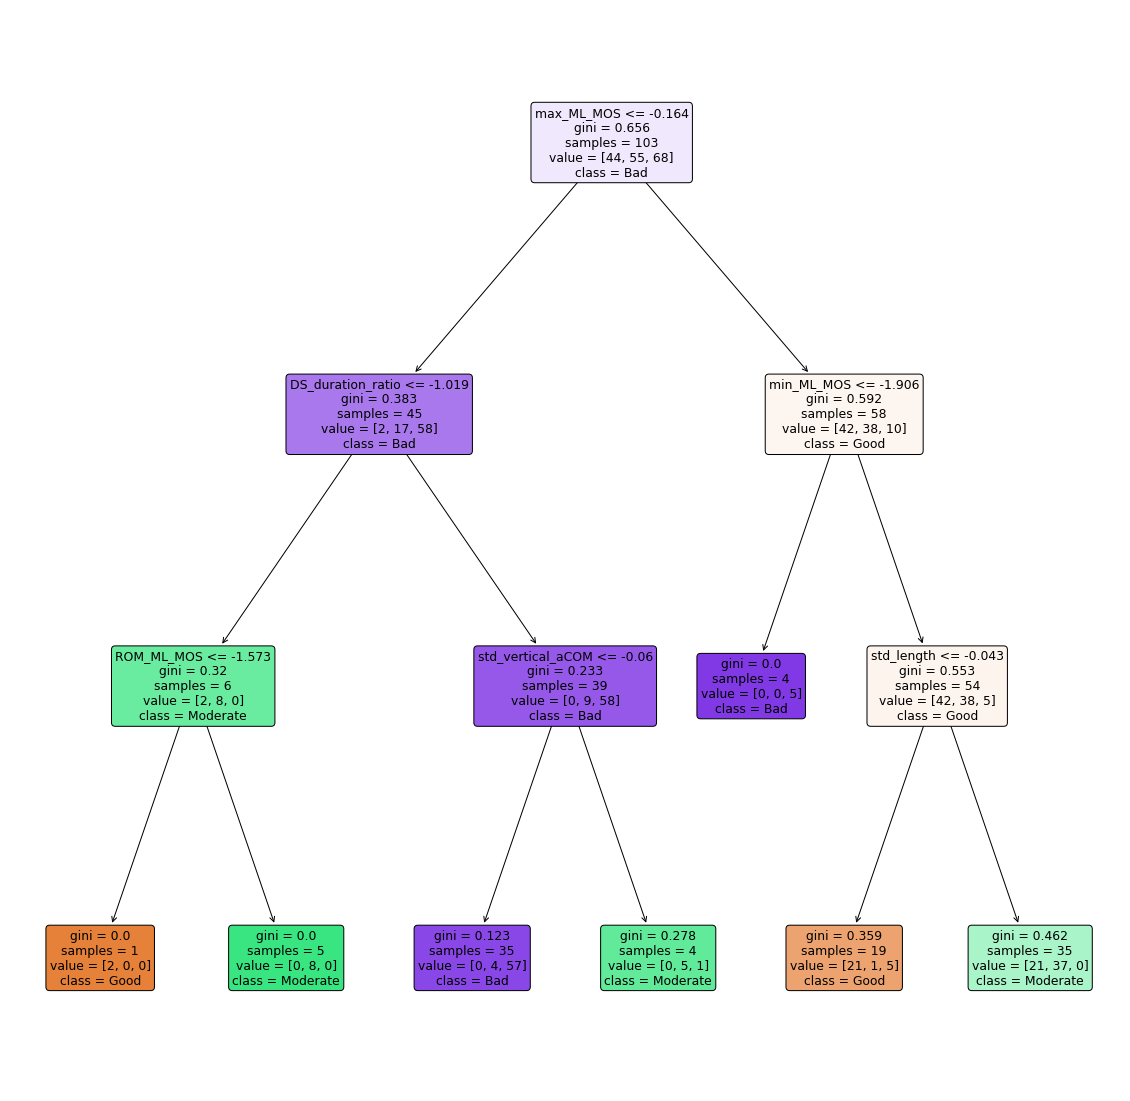

In [488]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_RF_best_reg.estimators_[0], 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [489]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [490]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv SVC
acc: 0.819
recall: 0.833
precision: 0.796


Text(0.5, 1.0, 'SVC confusion matrix')

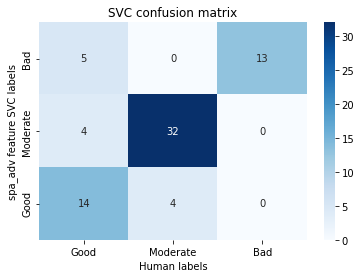

In [491]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [492]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature SVC Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 88.88888888888889 
 Bad prediction 100.0


In [493]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature SVC Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 88.88888888888889 
 Bad prediction 72.22222222222221


In [494]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv DT
acc: 0.819
recall: 0.8
precision: 0.804


Text(0.5, 1.0, 'DT confusion matrix')

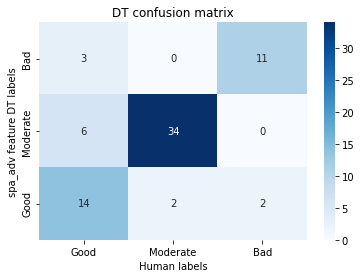

In [495]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [496]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature DT Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 94.44444444444444 
 Bad prediction 84.61538461538461


In [497]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 85.0 
 Bad prediction 78.57142857142857


In [498]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv RF
acc: 0.792
recall: 0.76
precision: 0.773


Text(0.5, 1.0, 'RF confusion matrix')

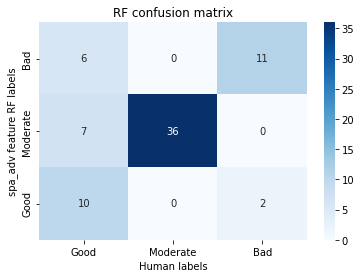

In [499]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [500]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature RF Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 100.0 
 Bad prediction 84.61538461538461


In [501]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature RF Precision: 
 Good prediction: 83.33333333333334 
 Moderate prediction 83.72093023255815 
 Bad prediction 64.70588235294117


### cop adv features

In [502]:
cop_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
cop_adv_SVC_grid_search.fit(cop_adv_x_train, y_train.ravel())
cop_adv_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [503]:
cop_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
cop_adv_DT_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8}

In [504]:
cop_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
cop_adv_RF_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 200}

In [505]:
cop_adv_SVC_best_reg = cop_adv_SVC_grid_search.best_estimator_
cop_adv_DT_best_reg = cop_adv_DT_grid_search.best_estimator_
cop_adv_RF_best_reg = cop_adv_RF_grid_search.best_estimator_

In [506]:
cop_adv_SVC_best_reg.score(cop_adv_x_test, y_test.ravel())

0.75

In [507]:
cop_adv_DT_best_reg.score(cop_adv_x_test, y_test.ravel())

0.75

In [508]:
cop_adv_RF_best_reg.score(cop_adv_x_test, y_test.ravel())

0.6805555555555556

[Text(558.0, 951.3000000000001, 'mean_AP_MOS <= 0.452\ngini = 0.655\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_xCOM <= 1.217\ngini = 0.425\nsamples = 99\nvalue = [2, 27, 70]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'mean_AP_MOS <= -0.883\ngini = 0.309\nsamples = 76\nvalue = [2, 12, 62]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.576\nsamples = 19\nvalue = [2, 10, 7]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.068\nsamples = 57\nvalue = [0, 2, 55]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'mean_ML_MOS <= -0.271\ngini = 0.454\nsamples = 23\nvalue = [0, 15, 8]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.198\nsamples = 9\nvalue = [0, 1, 8]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_xCOM <= 0.355\ngini = 0.465\nsamples = 68\nvalue = [43, 25, 0]\nclass = Good'),
 Text(697.5, 40

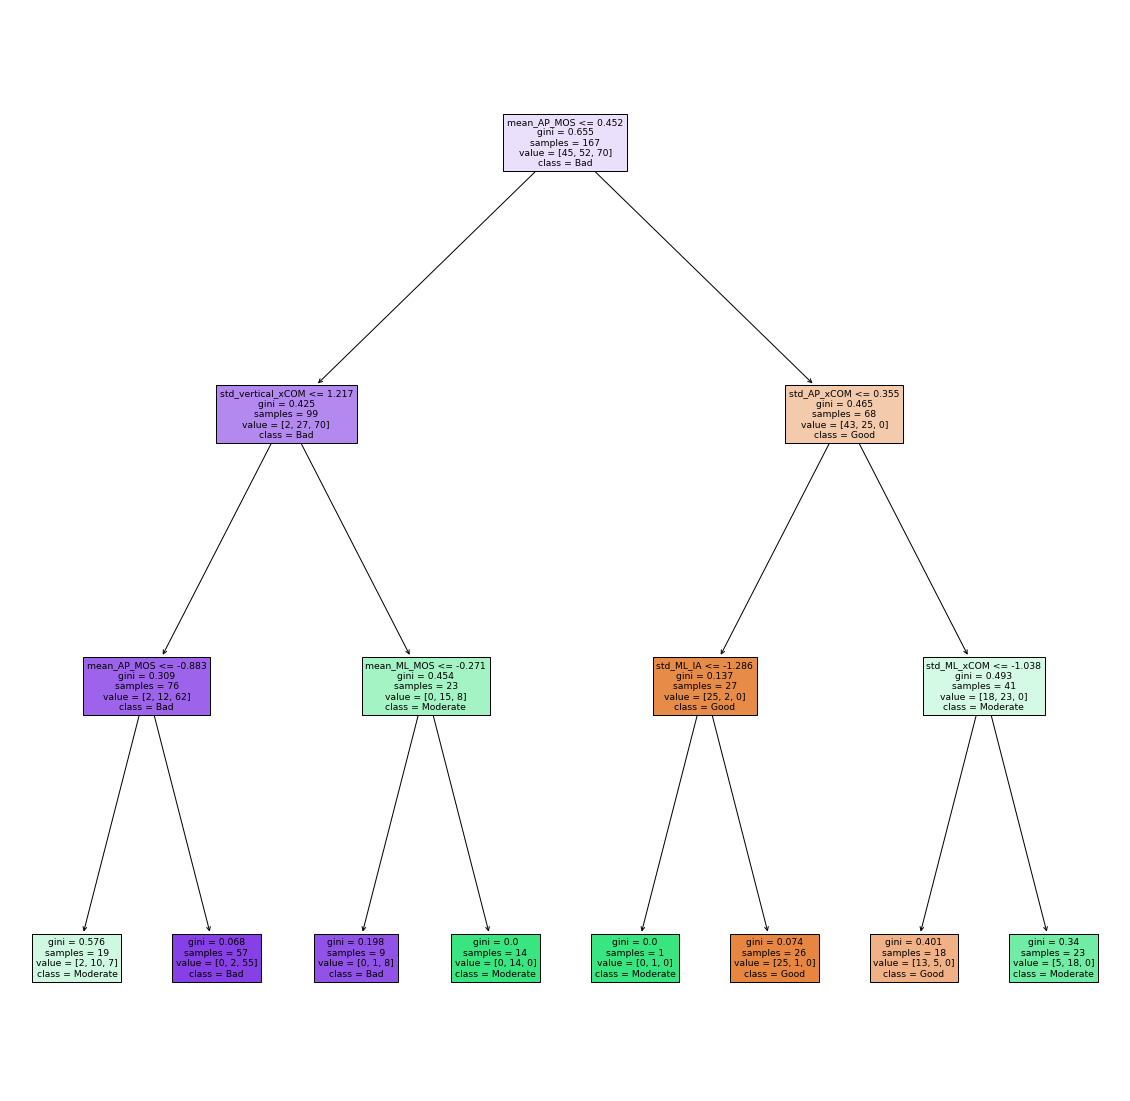

In [509]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_DT_best_reg, 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(496.0, 951.3000000000001, 'max_ML_MOS <= -0.035\ngini = 0.645\nsamples = 99\nvalue = [41, 51, 75]\nclass = Bad'),
 Text(248.0, 679.5, 'mean_ML_MOS <= -2.787\ngini = 0.439\nsamples = 47\nvalue = [5, 19, 59]\nclass = Bad'),
 Text(124.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [4, 0, 0]\nclass = Good'),
 Text(372.0, 407.70000000000005, 'std_vertical_xCOM <= 0.715\ngini = 0.384\nsamples = 45\nvalue = [1, 19, 59]\nclass = Bad'),
 Text(248.0, 135.89999999999998, 'gini = 0.147\nsamples = 27\nvalue = [1, 3, 47]\nclass = Bad'),
 Text(496.0, 135.89999999999998, 'gini = 0.49\nsamples = 18\nvalue = [0, 16, 12]\nclass = Moderate'),
 Text(744.0, 679.5, 'min_ML_MOS <= -1.952\ngini = 0.635\nsamples = 52\nvalue = [36, 32, 16]\nclass = Good'),
 Text(620.0, 407.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 8]\nclass = Bad'),
 Text(868.0, 407.70000000000005, 'mean_AP_MOS <= 1.041\ngini = 0.587\nsamples = 49\nvalue = [36, 32, 8]\nclass = Good'),
 Text(744.0, 135.8999999999999

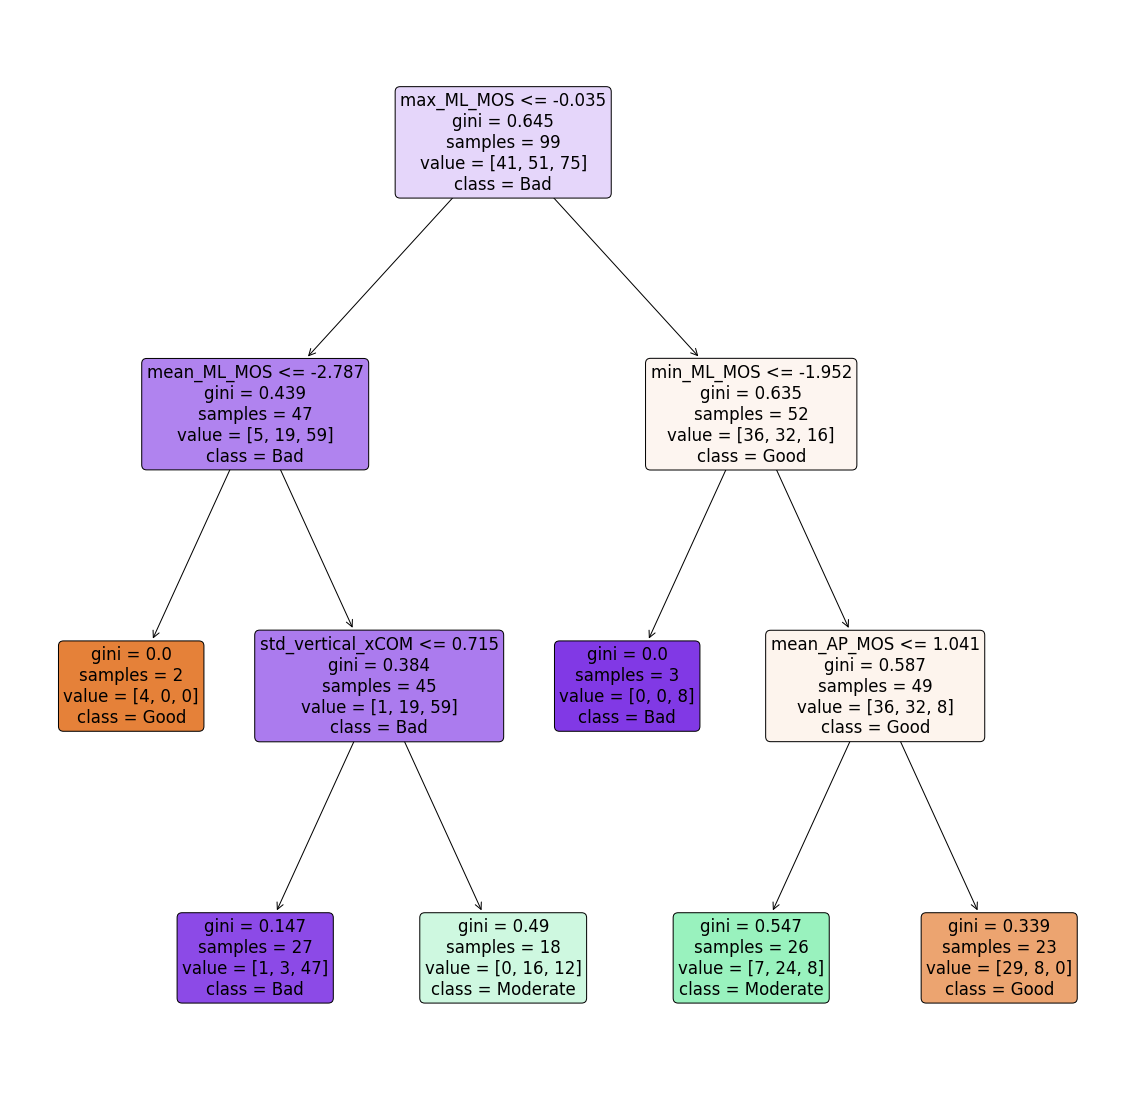

In [510]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_RF_best_reg.estimators_[0], 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [511]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [512]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv SVC
acc: 0.75
recall: 0.754
precision: 0.723


Text(0.5, 1.0, 'SVC confusion matrix')

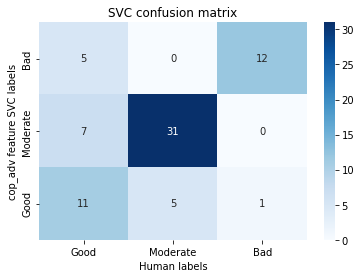

In [513]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [514]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature SVC Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 86.11111111111111 
 Bad prediction 92.3076923076923


In [515]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature SVC Precision: 
 Good prediction: 64.70588235294117 
 Moderate prediction 81.57894736842105 
 Bad prediction 70.58823529411765


In [516]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv DT
acc: 0.75
recall: 0.715
precision: 0.7


Text(0.5, 1.0, 'DT confusion matrix')

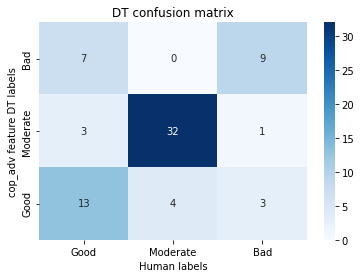

In [517]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [518]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature DT Sensitivity: 
 Good prediction: 56.52173913043478 
 Moderate prediction 88.88888888888889 
 Bad prediction 69.23076923076923


In [519]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature DT Precision: 
 Good prediction: 65.0 
 Moderate prediction 88.88888888888889 
 Bad prediction 56.25


In [520]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv RF
acc: 0.681
recall: 0.656
precision: 0.598


Text(0.5, 1.0, 'RF confusion matrix')

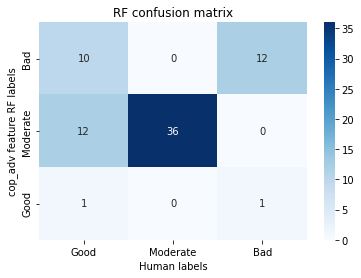

In [521]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [522]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature RF Sensitivity: 
 Good prediction: 4.3478260869565215 
 Moderate prediction 100.0 
 Bad prediction 92.3076923076923


In [523]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature RF Precision: 
 Good prediction: 50.0 
 Moderate prediction 75.0 
 Bad prediction 54.54545454545454


### kinematic features

In [524]:
kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
kine_SVC_grid_search.fit(kine_x_train, y_train.ravel())
kine_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [525]:
kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
kine_DT_grid_search.fit(kine_x_train, y_train)
kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 9}

In [526]:
kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
kine_RF_grid_search.fit(kine_x_train, y_train)
kine_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 100}

In [527]:
kine_SVC_best_reg = kine_SVC_grid_search.best_estimator_
kine_DT_best_reg = kine_DT_grid_search.best_estimator_
kine_RF_best_reg = kine_RF_grid_search.best_estimator_

In [528]:
kine_SVC_best_reg.score(kine_x_test, y_test.ravel())

0.8472222222222222

In [529]:
kine_DT_best_reg.score(kine_x_test, y_test.ravel())

0.8194444444444444

In [530]:
kine_RF_best_reg.score(kine_x_test, y_test.ravel())

0.8055555555555556

[Text(558.0, 996.6, 'mean_AP_MOS <= 0.452\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(304.3636363636364, 815.4000000000001, 'std_length <= -0.083\nentropy = 0.979\nsamples = 99\nvalue = [2, 27, 70]\nclass = Bad'),
 Text(202.9090909090909, 634.2, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(405.8181818181818, 634.2, 'mean_ML_SS_MOS <= -1.063\nentropy = 1.184\nsamples = 47\nvalue = [2, 27, 18]\nclass = Moderate'),
 Text(202.9090909090909, 453.0, 'min_ML_MOS <= -0.028\nentropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(101.45454545454545, 271.79999999999995, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = Bad'),
 Text(304.3636363636364, 271.79999999999995, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(608.7272727272727, 453.0, 'std_vertical_aCOM <= -0.19\nentropy = 0.91\nsamples = 40\nvalue = [0, 27, 13]\nclass = Moderate'),
 Text(507.27272727272725, 271.79999999999995, 'std_AP_vCOM

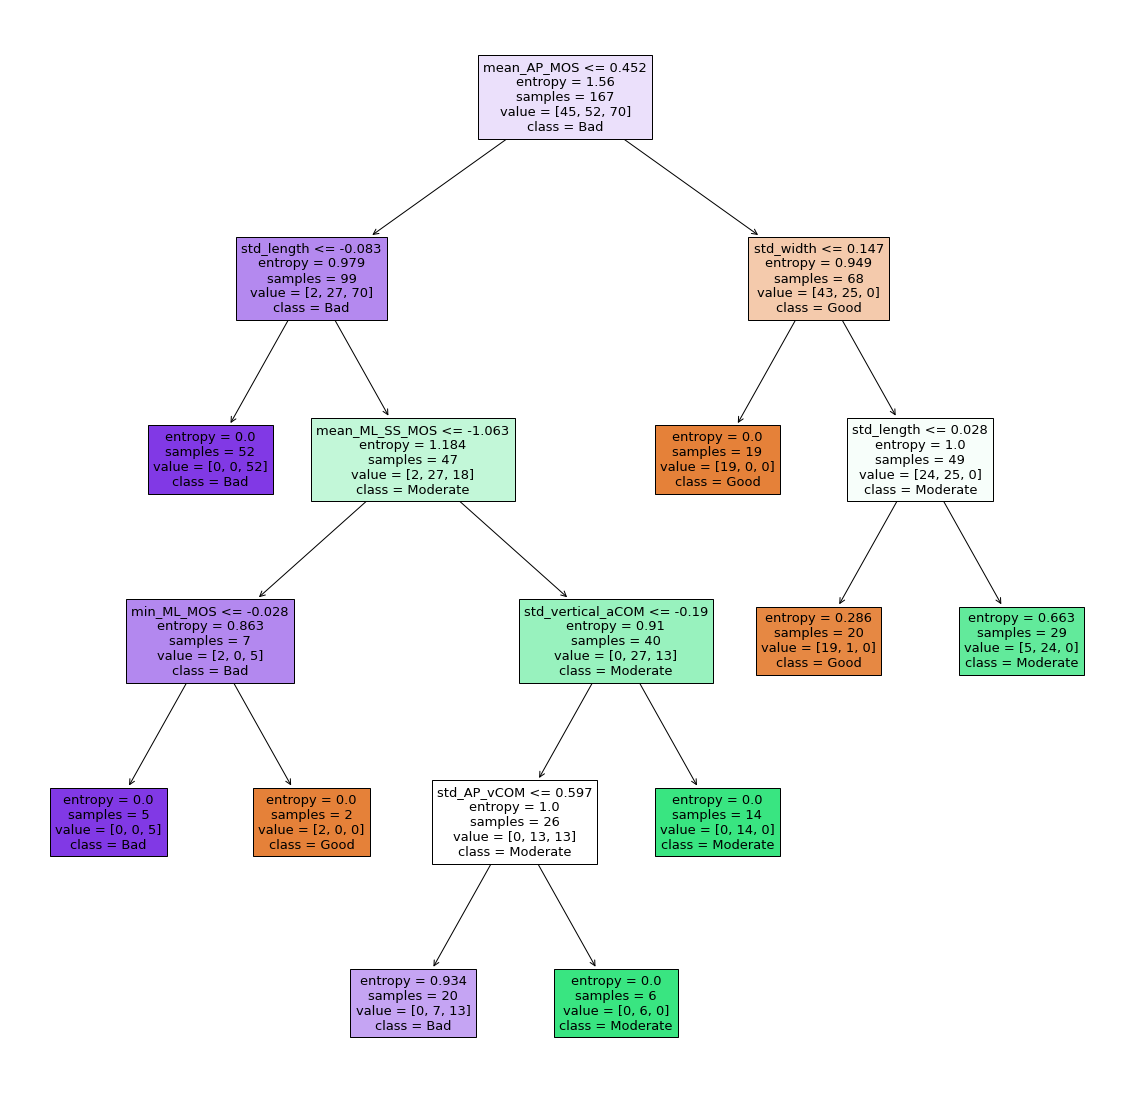

In [531]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_DT_best_reg, 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'std_vertical_xCOM <= -0.512\ngini = 0.632\nsamples = 106\nvalue = [35, 53, 79]\nclass = Bad'),
 Text(372.0, 679.5, 'std_ML_MOS <= 0.06\ngini = 0.484\nsamples = 38\nvalue = [33, 23, 0]\nclass = Good'),
 Text(186.0, 407.70000000000005, 'ROM_ML_MOS <= -0.387\ngini = 0.393\nsamples = 16\nvalue = [7, 19, 0]\nclass = Moderate'),
 Text(93.0, 135.89999999999998, 'gini = 0.408\nsamples = 6\nvalue = [5, 2, 0]\nclass = Good'),
 Text(279.0, 135.89999999999998, 'gini = 0.188\nsamples = 10\nvalue = [2, 17, 0]\nclass = Moderate'),
 Text(558.0, 407.70000000000005, 'SS_duration_ratio <= -0.911\ngini = 0.231\nsamples = 22\nvalue = [26, 4, 0]\nclass = Good'),
 Text(465.0, 135.89999999999998, 'gini = 0.32\nsamples = 4\nvalue = [1, 4, 0]\nclass = Moderate'),
 Text(651.0, 135.89999999999998, 'gini = 0.0\nsamples = 18\nvalue = [25, 0, 0]\nclass = Good'),
 Text(837.0, 679.5, 'std_length <= -0.09\ngini = 0.42\nsamples = 68\nvalue = [2, 30, 79]\nclass = Bad'),
 Text(744.0, 407.7

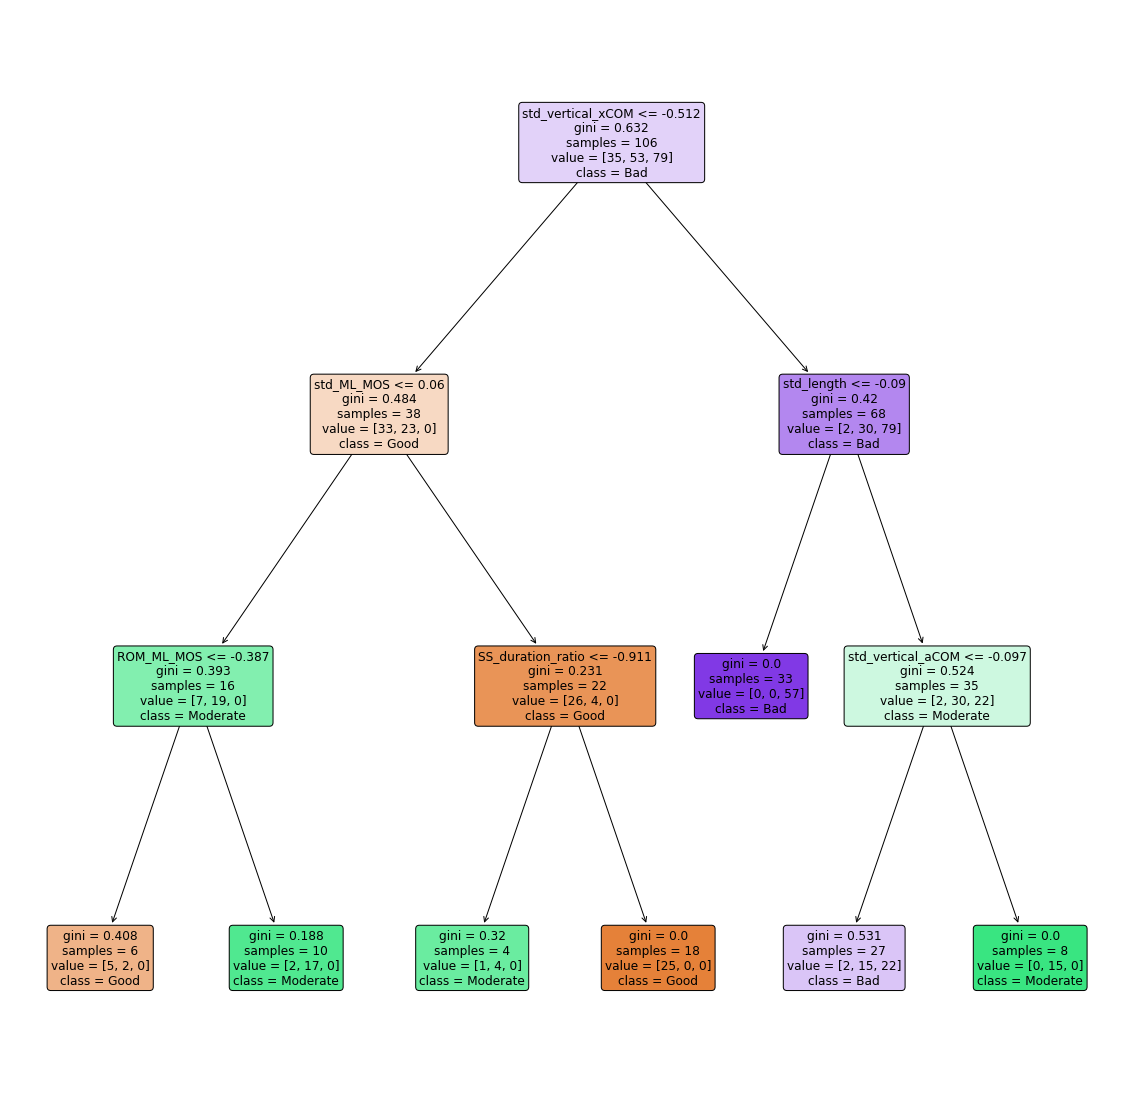

In [532]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_RF_best_reg.estimators_[0], 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [533]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [534]:
acc_3_t = accuracy_score(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine SVC
acc: 0.847
recall: 0.835
precision: 0.826


Text(0.5, 1.0, 'SVC confusion matrix')

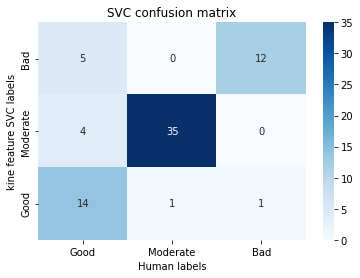

In [535]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [536]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature SVC Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 97.22222222222221 
 Bad prediction 92.3076923076923


In [537]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature SVC Precision: 
 Good prediction: 87.5 
 Moderate prediction 89.74358974358975 
 Bad prediction 70.58823529411765


In [538]:
acc_3_t = accuracy_score(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine DT
acc: 0.819
recall: 0.8
precision: 0.804


Text(0.5, 1.0, 'DT confusion matrix')

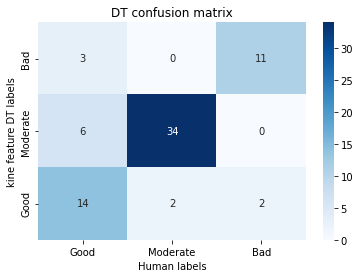

In [539]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [540]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature DT Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 94.44444444444444 
 Bad prediction 84.61538461538461


In [541]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature DT Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 85.0 
 Bad prediction 78.57142857142857


In [542]:
acc_3_t = accuracy_score(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine RF
acc: 0.806
recall: 0.791
precision: 0.789


Text(0.5, 1.0, 'RF confusion matrix')

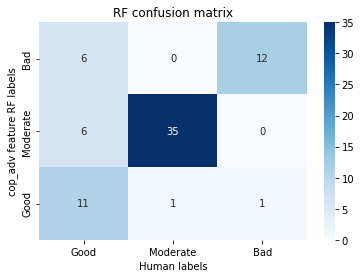

In [543]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [544]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature RF Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 97.22222222222221 
 Bad prediction 92.3076923076923


In [545]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature RF Precision: 
 Good prediction: 84.61538461538461 
 Moderate prediction 85.36585365853658 
 Bad prediction 66.66666666666666


### non kinematic features

In [546]:
non_kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
non_kine_SVC_grid_search.fit(non_kine_x_train, y_train.ravel())
non_kine_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [547]:
non_kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
non_kine_DT_grid_search.fit(non_kine_x_train, y_train)
non_kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 9}

In [548]:
non_kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
non_kine_RF_grid_search.fit(non_kine_x_train, y_train)
non_kine_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 200}

In [549]:
non_kine_SVC_best_reg = non_kine_SVC_grid_search.best_estimator_
non_kine_DT_best_reg = non_kine_DT_grid_search.best_estimator_
non_kine_RF_best_reg = non_kine_RF_grid_search.best_estimator_

In [550]:
non_kine_SVC_best_reg.score(non_kine_x_test, y_test.ravel())

0.6805555555555556

In [551]:
non_kine_DT_best_reg.score(non_kine_x_test, y_test.ravel())

0.6805555555555556

In [552]:
non_kine_RF_best_reg.score(non_kine_x_test, y_test.ravel())

0.625

[Text(496.0, 996.6, 'std_AP_aCOP <= -0.271\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 815.4000000000001, 'std_ML_vCOP <= -1.317\nentropy = 1.282\nsamples = 94\nvalue = [9, 28, 57]\nclass = Bad'),
 Text(124.0, 634.2, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7, 0]\nclass = Moderate'),
 Text(372.0, 634.2, 'mean_AP_IA <= -0.21\nentropy = 1.152\nsamples = 84\nvalue = [6, 21, 57]\nclass = Bad'),
 Text(248.0, 453.0, 'std_AP_IA <= 0.374\nentropy = 0.548\nsamples = 31\nvalue = [1, 2, 28]\nclass = Bad'),
 Text(124.0, 271.79999999999995, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27]\nclass = Bad'),
 Text(372.0, 271.79999999999995, 'entropy = 1.5\nsamples = 4\nvalue = [1, 2, 1]\nclass = Moderate'),
 Text(496.0, 453.0, 'entropy = 1.328\nsamples = 53\nvalue = [5, 19, 29]\nclass = Bad'),
 Text(744.0, 815.4000000000001, 'std_AP_vCOP <= -0.136\nentropy = 1.474\nsamples = 73\nvalue = [36, 24, 13]\nclass = Good'),
 Text(620.0, 634.2, 'entropy = 0.736\nsamples 

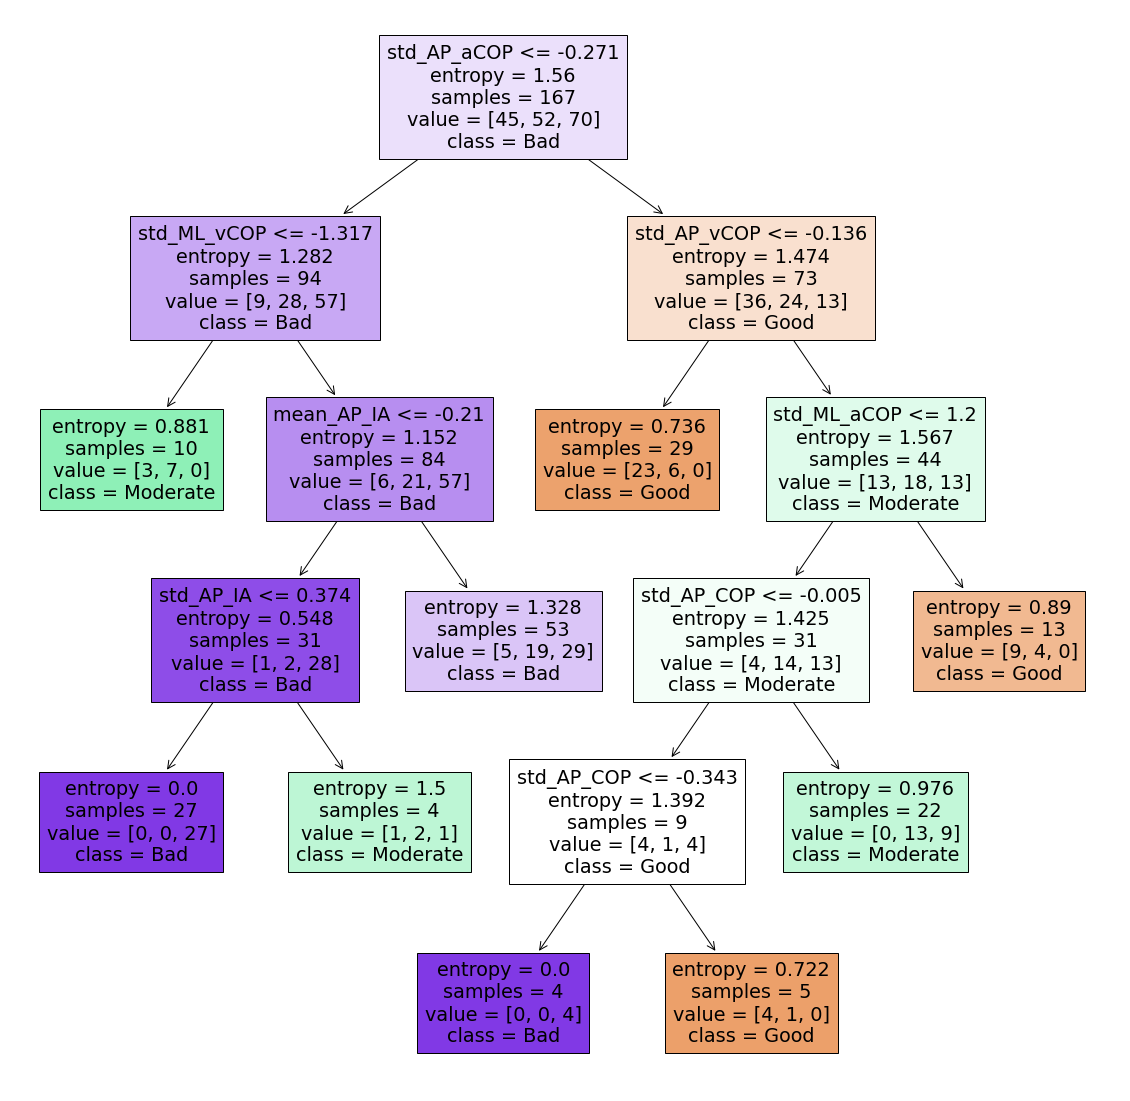

In [553]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_DT_best_reg, 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_aCOP <= -0.28\ngini = 0.65\nsamples = 103\nvalue = [40, 57, 70]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_vCOP <= -0.595\ngini = 0.521\nsamples = 63\nvalue = [9, 29, 63]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'mean_AP_IA <= 2.384\ngini = 0.498\nsamples = 11\nvalue = [3, 10, 2]\nclass = Moderate'),
 Text(69.75, 135.89999999999998, 'gini = 0.379\nsamples = 9\nvalue = [2, 10, 1]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_AP_COP <= -1.223\ngini = 0.443\nsamples = 52\nvalue = [6, 19, 61]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.49\nsamples = 4\nvalue = [3, 4, 0]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'gini = 0.366\nsamples = 48\nvalue = [3, 15, 61]\nclass = Bad'),
 Text(837.0, 679.5, 'std_AP_vCOP <= -0.136\ngini = 0.588\nsamples = 40\nvalue = [31, 28, 7]\nclass = Good'),
 Text(697.5, 407.70000000

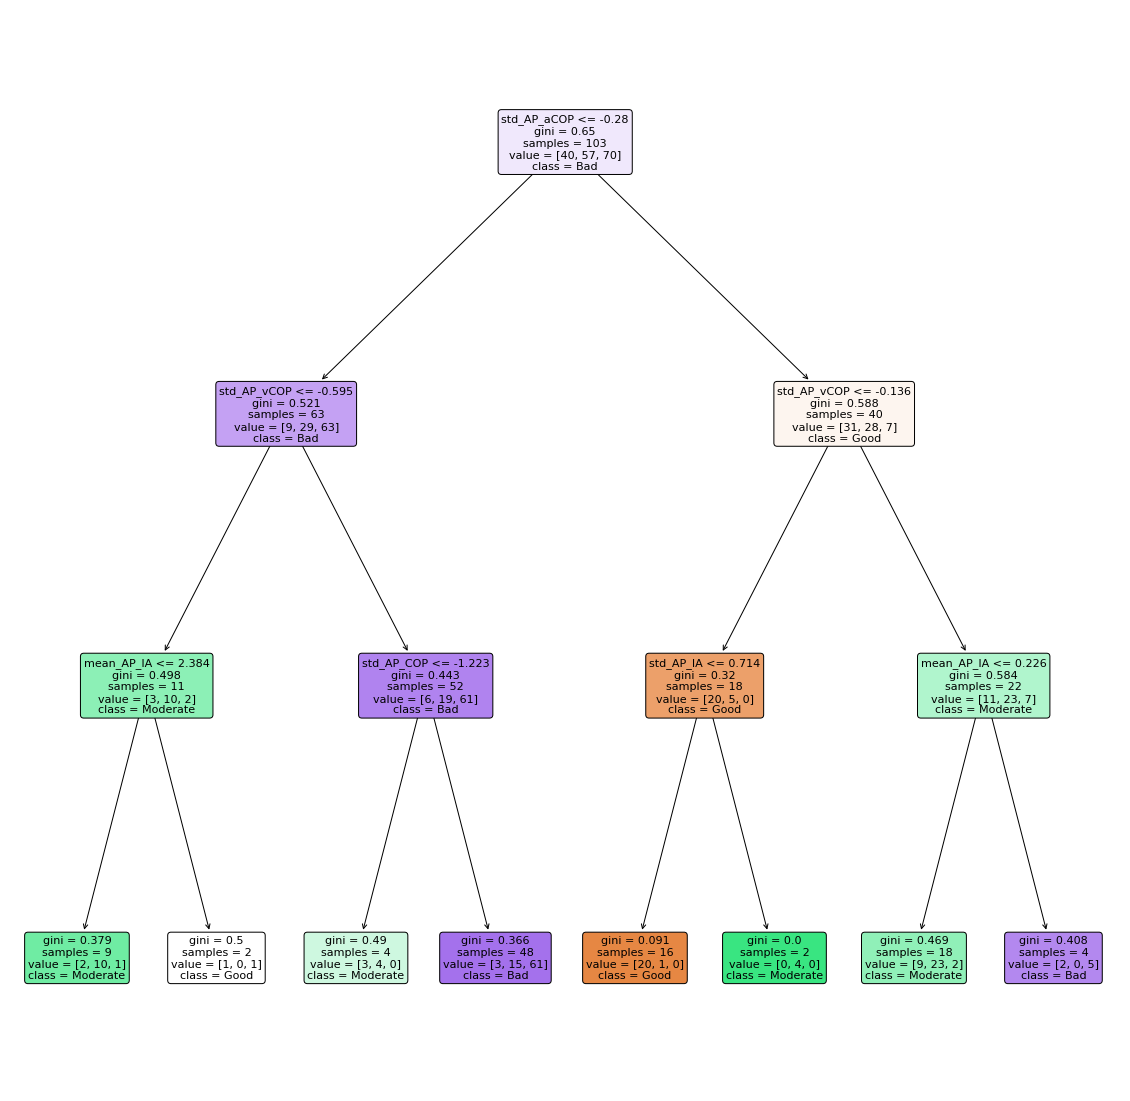

In [554]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_RF_best_reg.estimators_[0], 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [555]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [556]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine SVC
acc: 0.681
recall: 0.626
precision: 0.645


Text(0.5, 1.0, 'SVC confusion matrix')

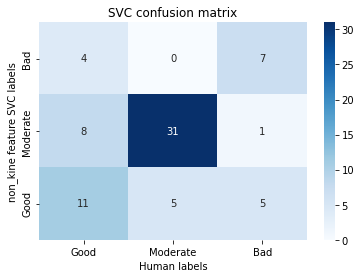

In [557]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [558]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature SVC Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 86.11111111111111 
 Bad prediction 53.84615384615385


In [559]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature SVC Precision: 
 Good prediction: 52.38095238095239 
 Moderate prediction 77.5 
 Bad prediction 63.63636363636363


In [560]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine DT
acc: 0.681
recall: 0.708
precision: 0.672


Text(0.5, 1.0, 'DT confusion matrix')

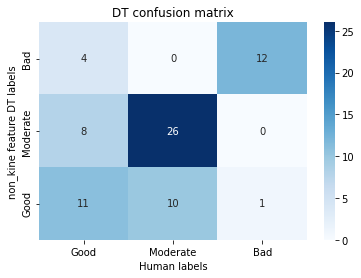

In [561]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [562]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature DT Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 72.22222222222221 
 Bad prediction 92.3076923076923


In [563]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature DT Precision: 
 Good prediction: 50.0 
 Moderate prediction 76.47058823529412 
 Bad prediction 75.0


In [564]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine RF
acc: 0.625
recall: 0.601
precision: 0.598


Text(0.5, 1.0, 'RF confusion matrix')

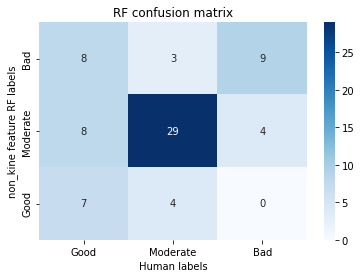

In [565]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [566]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature RF Sensitivity: 
 Good prediction: 30.434782608695656 
 Moderate prediction 80.55555555555556 
 Bad prediction 69.23076923076923


In [567]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature RF Precision: 
 Good prediction: 63.63636363636363 
 Moderate prediction 70.73170731707317 
 Bad prediction 45.0


In [568]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [569]:
onehotencoder = OneHotEncoder()
onehot_targets = onehotencoder.fit_transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [570]:
targets_bad

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [571]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_RF_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_RF_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_RF_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_RF_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_RF_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [572]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [573]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'RF')

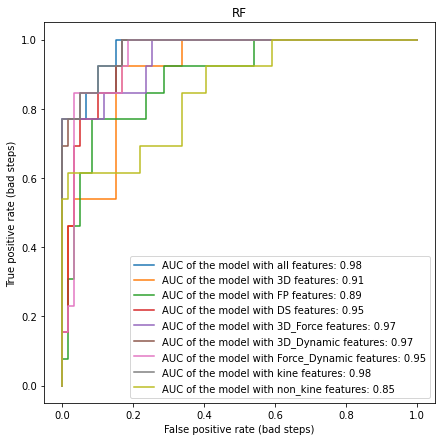

In [574]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("RF")

In [575]:
all_predictions = all_DT_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_DT_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_DT_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_DT_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_DT_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_DT_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_DT_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_DT_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_DT_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [576]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [577]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'DT')

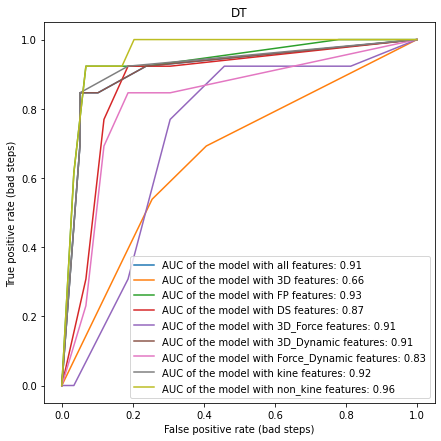

In [578]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("DT")

Text(0.5, 0, 'important')

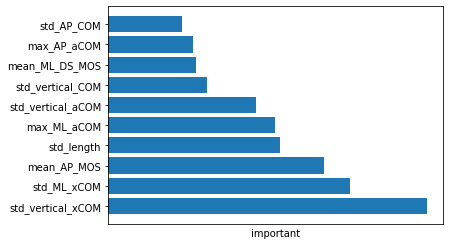

In [579]:
importance = all_RF_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = [1,2,3,4,5,6,7,8,9,10]
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

Text(0.5, 0, 'important')

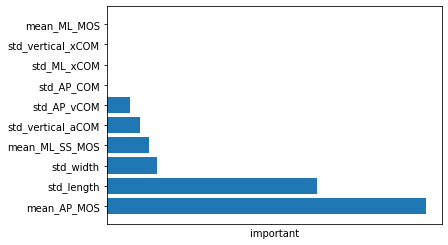

In [580]:
importance = all_DT_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = range(1,11)
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

In [581]:
importance_sorted_df.head()

importance           features
27    0.470027        mean_AP_MOS
13    0.309666         std_length
14    0.073706          std_width
31    0.062592     mean_ML_SS_MOS
8     0.049288  std_vertical_aCOM

In [582]:
all_DT_best_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.03472026, 0.        ,
       0.        , 0.        , 0.        , 0.04928843, 0.        ,
       0.        , 0.        , 0.        , 0.30966602, 0.07370607,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.47002679, 0.        , 0.        ,
       0.        , 0.06259242, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [583]:
df

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0    sub01    220.0775     12.3263           12.8126    767.2466     43.9719   
1    sub01    216.0915      8.1211           11.9798    751.3324     29.5469   
2    sub01    211.8467     10.7979           11.4190    738.7744     38.5899   
3    sub01    214.9099     10.5054           13.2807    746.7116     38.3915   
4    sub01    216.7382     11.0180           12.0510    754.5603     37.8966   
..     ...         ...         ...               ...         ...         ...   
236  sub19    196.7297      6.2052           10.8985    676.2658     20.9325   
237  sub19         NaN         NaN               NaN         NaN         NaN   
238  sub19    197.0349      6.1510           10.1120    677.5944     22.0070   
239  sub19    199.0602      8.2793           12.0286    689.5390     29.0360   
240  sub19    113.2084      9.3861           11.1652    381.8317     30.4145   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
0       174.0450     211.6344           284.2892    2496.6766  ...   
1       178.2405     195.6437           271.4910    2495.9274  ...   
2       178.0001     188.3602           246.0608    2283.5418  ...   
3       141.7616     228.5704           334.1286    3275.9483  ...   
4       194.5135     189.7581           299.6605    3465.1921  ...   
..           ...          ...                ...          ...  ...   
236     141.3072     115.4735           265.9989    2734.8590  ...   
237          NaN          NaN                NaN          NaN  ...   
238     155.8108     157.6256           285.9923    3300.1802  ...   
239     192.5146     172.6774           307.0856    3232.6687  ...   
240     173.2414      94.6692           162.0916    3040.6362  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
0      -87.0116    562.7531    206.2984   -0.184070     3.79000     7.6335   
1     -101.6375    358.0427    219.0050   -0.549220    -4.27050     7.5783   
2     -136.7953    798.2827    219.7981   17.737300    -6.19410     2.4905   
3     -118.3031    387.3621    240.2440   -1.097000     4.00500     6.9300   
4     -164.7282    828.7364    267.5760    0.018363    -3.76180     7.7442   
..          ...         ...         ...         ...         ...        ...   
236    -77.3934    782.8786    174.1775    9.904500     0.52942    10.6482   
237         NaN         NaN         NaN         NaN         NaN        NaN   
238    -88.3604    758.1697    185.0617    0.090153     2.58430     6.5328   
239   -104.5713    772.9168    199.4940    0.399350    -2.96550     6.7424   
240   -105.4787    741.7409    120.3148    4.137300     1.99840     5.1704   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
0       1.8669    27.2933    10.8511                Good  
1       2.0262    27.0895    10.2120                Good  
2       1.1824     7.6797     4.0106                Good  
3       1.8443    24.9026    10.5530                Good  
4       1.8830    28.0477     9.7207                Good  
..         ...        ...        ...                 ...  
236     1.2334    39.3420     5.7719                 Bad  
237        NaN        NaN        NaN                 Bad  
238     1.5063    23.6745     7.1568                 Bad  
239     1.8309    24.7379     7.5070                 Bad  
240     1.9945    22.6889     7.3761                 Bad  

[241 rows x 71 columns]

## T-test

In [584]:
import scipy.stats as stats

In [585]:
def grouping_columns_infor(targeted_columns):
    col_infor = df[["target_performance", targeted_columns]]
    good_class = col_infor[col_infor["target_performance"] == "Good"][targeted_columns]
    mod_class = col_infor[col_infor["target_performance"] == "Moderate"][targeted_columns]
    bad_class = col_infor[col_infor["target_performance"] == "Bad"][targeted_columns]
    return [good_class, mod_class, bad_class]

### std_length

In [586]:
[good_std_length, mod_std_length, bad_std_length] = grouping_columns_infor(targeted_columns = "std_length")

In [587]:
good_M = round(good_std_length.mean(),3)
mod_M = round(mod_std_length.mean(),3)
bad_M = round(bad_std_length.mean(),3)
good_S = round(good_std_length.std(),3)
mod_S = round(mod_std_length.std(),3)
bad_S = round(bad_std_length.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:210.552, STD:7.288 
 Mod: M:194.72, STD:9.796 
 bad: M:204.592, STD:10.009 



In [588]:
good_std_length.mean()

210.55221733333335

In [589]:
t = stats.ttest_ind(good_std_length, mod_std_length).statistic
p = stats.ttest_ind(good_std_length, mod_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 11.861820258127535, p = 0.0


In [590]:
t = stats.ttest_ind(good_std_length, bad_std_length).statistic
p = stats.ttest_ind(good_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 4.000602705295138, p = 0.0


In [591]:
t = stats.ttest_ind(mod_std_length, bad_std_length).statistic
p = stats.ttest_ind(mod_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -6.1889803585786245, p = 0.0


### std_vertical_xCOM

In [592]:
[good_std_vertical_xCOM, mod_std_vertical_xCOM, bad_std_vertical_xCOM] = grouping_columns_infor(targeted_columns = "std_vretical_xCOM")

In [593]:
good_M = round(good_std_vertical_xCOM.mean(),3)
mod_M = round(mod_std_vertical_xCOM.mean(),3)
bad_M = round(bad_std_vertical_xCOM.mean(),3)
good_S = round(good_std_vertical_xCOM.std(),3)
mod_S = round(mod_std_vertical_xCOM.std(),3)
bad_S = round(bad_std_vertical_xCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:0.063, STD:0.021 
 Mod: M:0.068, STD:0.011 
 bad: M:0.04, STD:0.008 



In [594]:
t = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -2.2407577692333573, p = 0.026


In [595]:
t = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [596]:
t = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


### max_ML_aCOM

In [597]:
[good_max_ML_aCOM, mod_max_ML_aCOM, bad_max_ML_aCOM] = grouping_columns_infor(targeted_columns = "max_ML_aCOM")

In [598]:
good_M = round(good_max_ML_aCOM.mean(),3)
mod_M = round(mod_max_ML_aCOM.mean(),3)
bad_M = round(bad_max_ML_aCOM.mean(),3)
good_S = round(good_max_ML_aCOM.std(),3)
mod_S = round(mod_max_ML_aCOM.std(),3)
bad_S = round(bad_max_ML_aCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:58385.956, STD:81372.65 
 Mod: M:23062.465, STD:12223.095 
 bad: M:75737.917, STD:68130.213 



In [599]:
t = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 4.404503303495522, p = 0.0


In [600]:
t = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [601]:
t = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


### mean_ML_MOS

In [602]:
[good_mean_ML_MOS, mod_mean_ML_MOS, bad_mean_ML_MOS] = grouping_columns_infor(targeted_columns = "mean_ML_MOS")

In [603]:
good_M = round(good_mean_ML_MOS.mean(),3)
mod_M = round(mod_mean_ML_MOS.mean(),3)
bad_M = round(bad_mean_ML_MOS.mean(),3)
good_S = round(good_mean_ML_MOS.std(),3)
mod_S = round(mod_mean_ML_MOS.std(),3)
bad_S = round(bad_mean_ML_MOS.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:-7.804, STD:17.612 
 Mod: M:-6.574, STD:17.529 
 bad: M:-14.732, STD:22.541 



In [604]:
t = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -0.46429919290498395, p = 0.643


In [605]:
t = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [606]:
t = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [607]:
all_clear_corr_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance']

In [608]:
all_clear_corr_df.to_csv("C:/Users/a1003/OneDrive/桌面/Thesis/feature_comparison/38_markers_df.csv")